In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from DataTransformation import LowPassFilter, PrincipalComponentAnalysis

In [ ]:
from TemporalAbstraction import NumericalAbstraction

In [ ]:
from FrequencyAbstraction import FourierTransformation

In [ ]:
df = pd.read_pickle("../../data/interim/outlier_removed_chauvenets.pkl")

In [ ]:
df

acc_x     acc_y     acc_z   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240  0.9760   

                         label category participant  set  
epoch (ms)                                                
2019-01-11 15:08:05.200  bench    heavy           B   30  
2019-01-11 15:08:05.400  bench    heavy           B   30  
2019-01-11 15:08:05.600  bench    heavy           B   30  
2019-01-11 15:08:05.800  bench    heavy           B   30  
2019-01-11 15:08:06.000  bench    heavy           B   30  
...                        ...      ...         ...  ...  
2019-01-20 17:33:27.000    row   medium           E   90  
2019-01-20 17:33:27.200    row   medium           E   90  
2019-01-20 17:33:27.400    row   medium           E   90  
2019-01-20 17:33:27.600    row   medium           E   90  
2019-01-20 17:33:27.800    row   medium           E   90  

[9009 rows x 10 columns]

In [ ]:
perdictor_columns = list(df.columns[:6])

In [ ]:
plt.style.use("fivethirtyeight")

In [ ]:
plt.rcParams["figure.figsize"] = (20, 5)

In [ ]:
plt.rcParams["figure.dpi"] = 100

In [ ]:
plt.rcParams["lines.linewidth"] = 2

In [ ]:
for col in perdictor_columns:

SyntaxError: unexpected EOF while parsing (<ipython-input-15-488a323edee4>, line 1)

In [ ]:
for col in perdictor_columns:
    df[col] = df[col].interpolate()

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   label        9009 non-null   object 
 7   category     9009 non-null   object 
 8   participant  9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   label        9009 non-null   object 
 7   category     9009 non-null   object 
 8   participant  9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


<AxesSubplot: xlabel='epoch (ms)'>

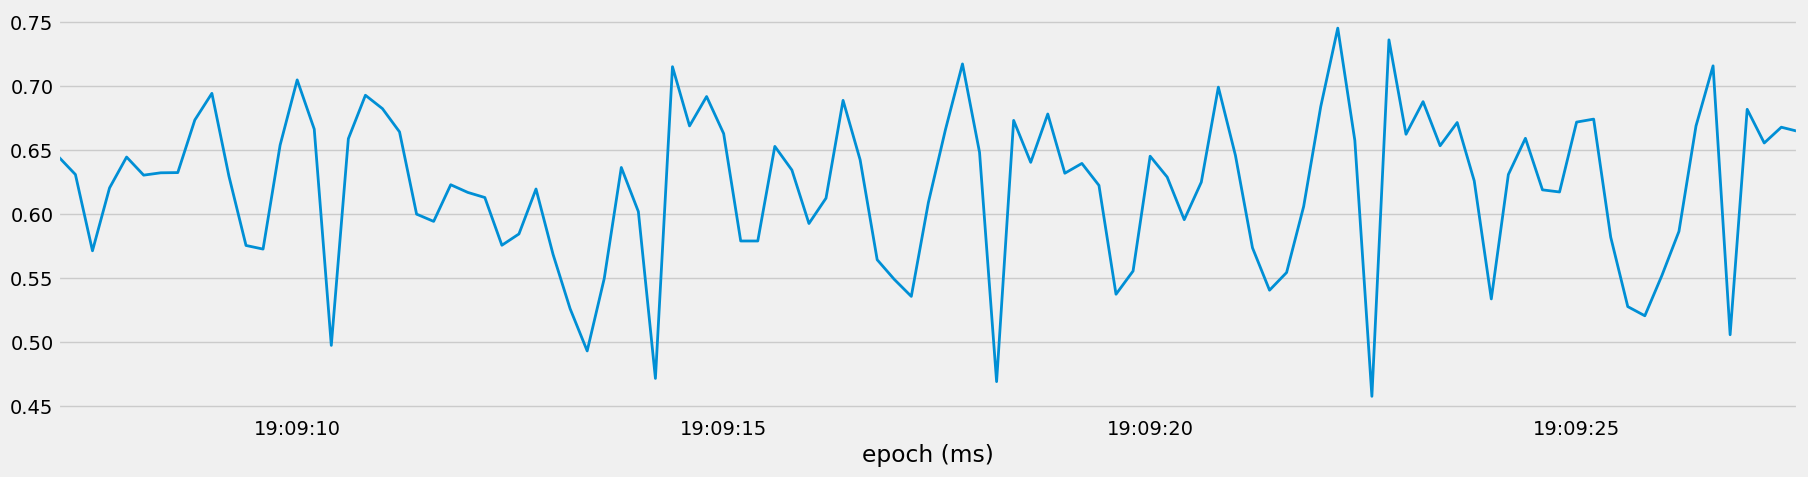

In [ ]:
df[df["set"] == 25]["acc_y"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

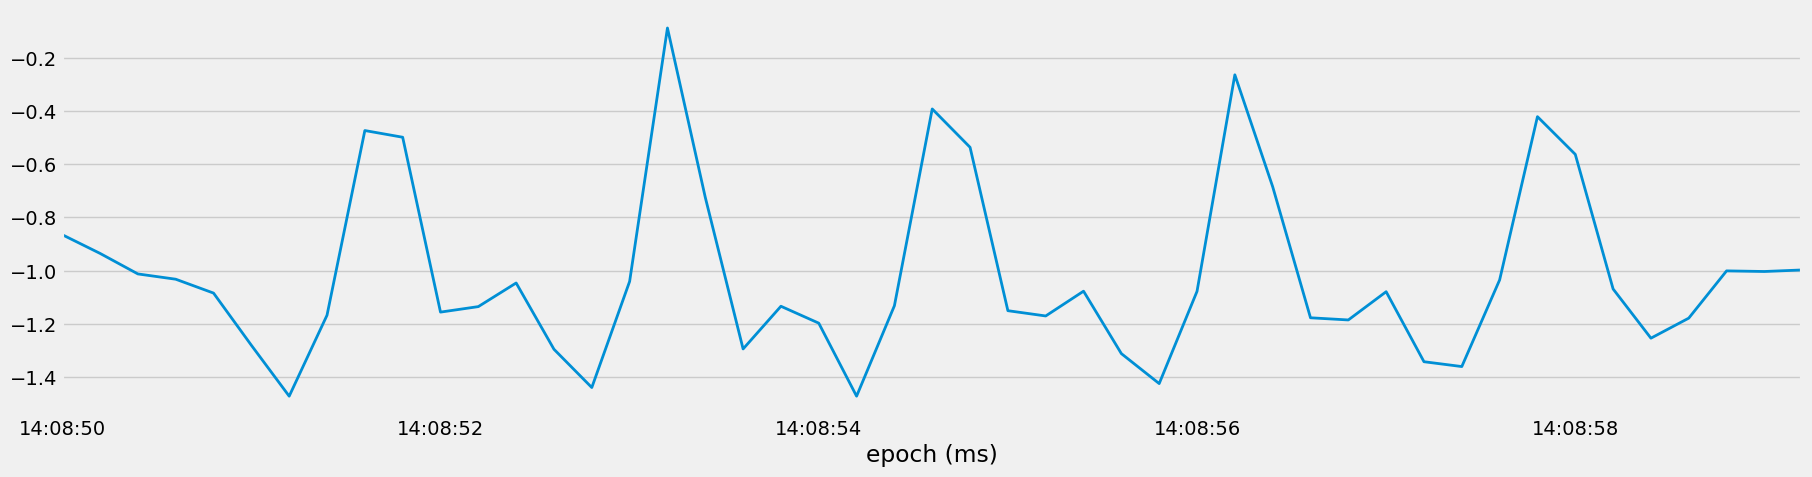

In [ ]:
df[df["set"] == 50]["acc_y"].plot()

In [ ]:
duration = df[df["set"] == 1].index[-1] - df[df["set"] == 1].index[0]
duration.seconds

16

In [ ]:
for s in df["set"].unique():
    start = df[df["set"] == s].index[0]
    stop = df[df["set"] == s].index[-1]

    duration = stop - start
    df.loc[(df["set"] == s), "duration"] = duration.seconds

In [ ]:
duration_df = df.groupby(["category"])["duration"].mean()

In [ ]:
duration_df

category
heavy       14.743501
medium      24.942529
sitting     33.000000
standing    39.000000
Name: duration, dtype: float64

In [ ]:
duration_df.iloc[0] / 5

2.9487001733102254

In [ ]:
duration_df.iloc[1] / 10

2.4942528735632186

In [ ]:
df_lowpass = df.copy()

In [ ]:
LowPass = LowPassFilter()

In [ ]:
df_lowpass

acc_x     acc_y     acc_z   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240  0.9760   

                         label category participant  set  duration  
epoch (ms)                                                          
2019-01-11 15:08:05.200  bench    heavy           B   30      16.0  
2019-01-11 15:08:05.400  bench    heavy           B   30      16.0  
2019-01-11 15:08:05.600  bench    heavy           B   30      16.0  
2019-01-11 15:08:05.800  bench    heavy           B   30      16.0  
2019-01-11 15:08:06.000  bench    heavy           B   30      16.0  
...                        ...      ...         ...  ...       ...  
2019-01-20 17:33:27.000    row   medium           E   90      19.0  
2019-01-20 17:33:27.200    row   medium           E   90      19.0  
2019-01-20 17:33:27.400    row   medium           E   90      19.0  
2019-01-20 17:33:27.600    row   medium           E   90      19.0  
2019-01-20 17:33:27.800    row   medium           E   90      19.0  

[9009 rows x 11 columns]

In [ ]:
LowPass

In [ ]:
df_lowpass = df.copy()

In [ ]:
LowPass = LowPassFilter()

In [ ]:
fs = 1000 / 200

In [ ]:
cutoff = 1.2

In [ ]:
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acc_y", fs, cutoff, order=5)

In [ ]:
subset = df_lowpass[df_lowpass["set"] == 45]

In [ ]:
print(subset["label"][0])

ohp


In [ ]:
print(subset["label"][0])

ohp


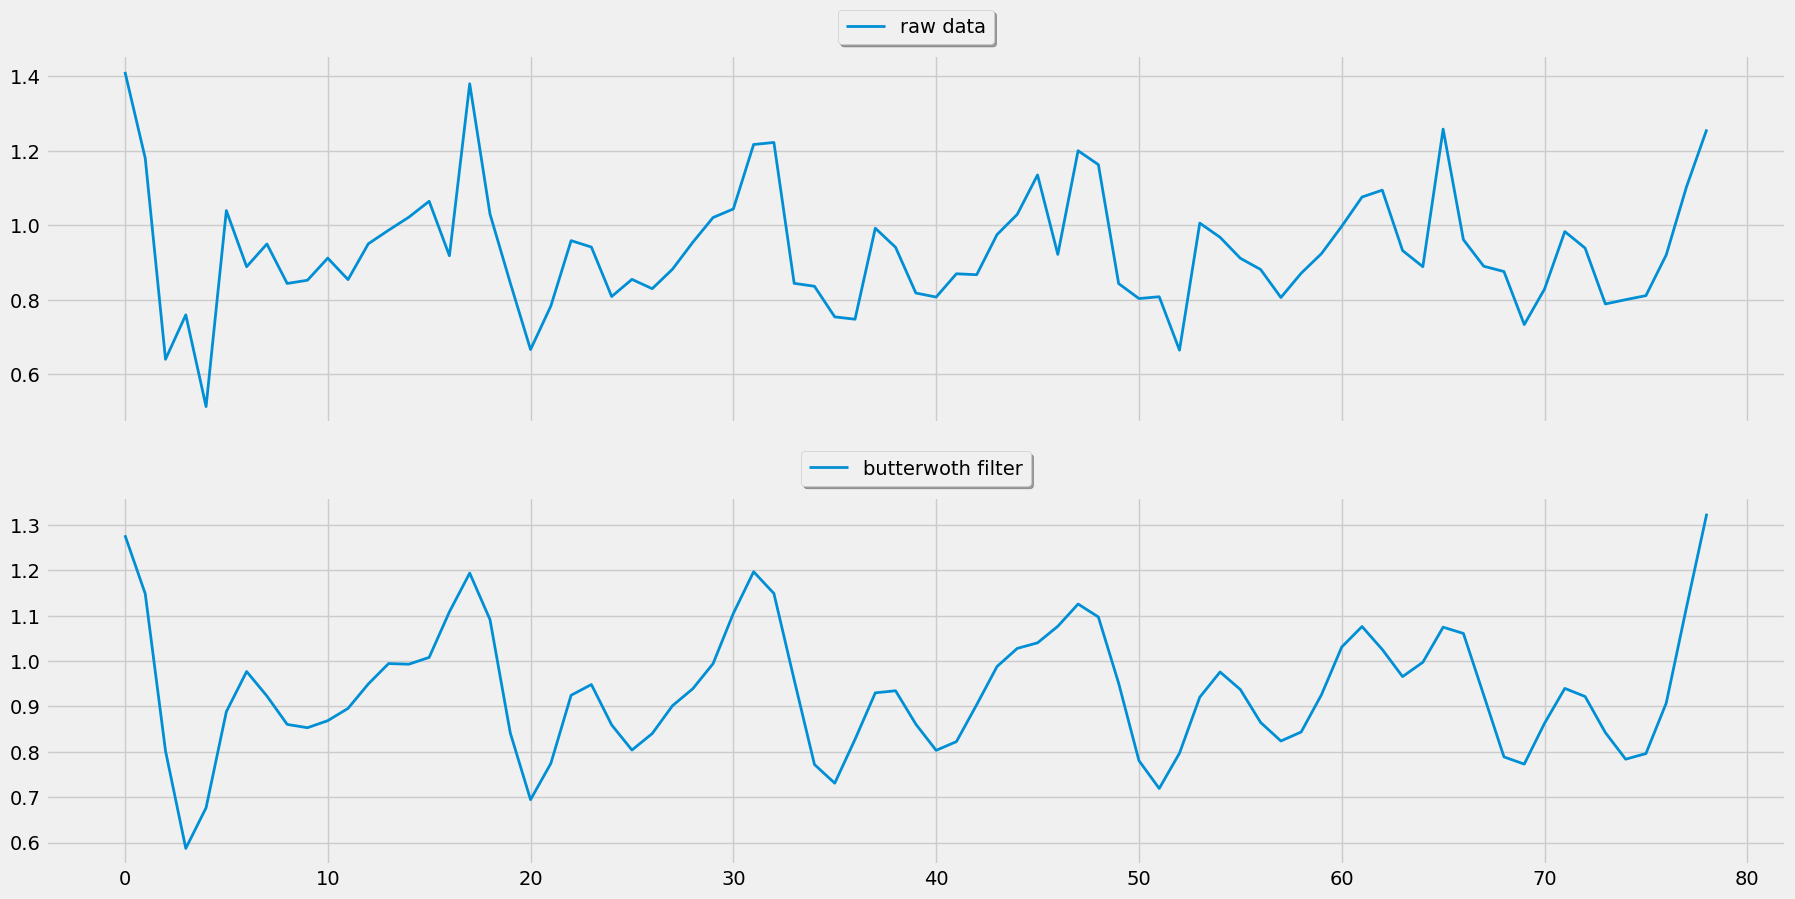

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acc_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop=True), label="butterwoth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)

In [ ]:
for col in perdictor_columns:
    df_lowpass = LowPass.low_pass_filter(df_lowpass, col, fs, cutoff, order=5)
    df_lowpass[col] = df_lowpass[col + "_lowpass"]
    del df_lowpass[col + "_lowpass"]

In [ ]:
perdictor_columns

['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']

In [ ]:
df_lowpass

acc_x     acc_y     acc_z     gyr_x     gyr_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013494  0.977006 -0.070995 -1.896395  2.439080   
2019-01-11 15:08:05.400  0.006869  0.970289 -0.067545  2.129685  0.528678   
2019-01-11 15:08:05.600 -0.009603  0.963587 -0.073447  4.151973 -2.092258   
2019-01-11 15:08:05.800 -0.022998  0.965380 -0.083731  2.074477 -3.626288   
2019-01-11 15:08:06.000 -0.020032  0.966778 -0.093783  1.041930 -1.219897   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.045056 -0.974791 -0.061752  3.273522 -4.487268   
2019-01-20 17:33:27.200 -0.042806 -1.020916 -0.057715 -2.514546 -2.449224   
2019-01-20 17:33:27.400 -0.047074 -1.051656 -0.066326 -0.673530 -1.799975   
2019-01-20 17:33:27.600 -0.049361 -1.040440 -0.066542  2.411744 -2.591221   
2019-01-20 17:33:27.800 -0.043963 -1.033252 -0.058673  1.038150 -3.997470   

                            gyr_z  label category participant  set  duration  
epoch (ms)                                                                    
2019-01-11 15:08:05.200  0.939616  bench    heavy           B   30      16.0  
2019-01-11 15:08:05.400 -1.248135  bench    heavy           B   30      16.0  
2019-01-11 15:08:05.600 -0.929804  bench    heavy           B   30      16.0  
2019-01-11 15:08:05.800  0.880509  bench    heavy           B   30      16.0  
2019-01-11 15:08:06.000 -2.260590  bench    heavy           B   30      16.0  
...                           ...    ...      ...         ...  ...       ...  
2019-01-20 17:33:27.000  0.133850    row   medium           E   90      19.0  
2019-01-20 17:33:27.200  1.255524    row   medium           E   90      19.0  
2019-01-20 17:33:27.400  1.193779    row   medium           E   90      19.0  
2019-01-20 17:33:27.600  0.659428    row   medium           E   90      19.0  
2019-01-20 17:33:27.800  0.988567    row   medium           E   90      19.0  

[9009 rows x 11 columns]

In [ ]:
df_pca = df_lowpass.copy()

In [ ]:
df_pca

acc_x     acc_y     acc_z     gyr_x     gyr_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013494  0.977006 -0.070995 -1.896395  2.439080   
2019-01-11 15:08:05.400  0.006869  0.970289 -0.067545  2.129685  0.528678   
2019-01-11 15:08:05.600 -0.009603  0.963587 -0.073447  4.151973 -2.092258   
2019-01-11 15:08:05.800 -0.022998  0.965380 -0.083731  2.074477 -3.626288   
2019-01-11 15:08:06.000 -0.020032  0.966778 -0.093783  1.041930 -1.219897   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.045056 -0.974791 -0.061752  3.273522 -4.487268   
2019-01-20 17:33:27.200 -0.042806 -1.020916 -0.057715 -2.514546 -2.449224   
2019-01-20 17:33:27.400 -0.047074 -1.051656 -0.066326 -0.673530 -1.799975   
2019-01-20 17:33:27.600 -0.049361 -1.040440 -0.066542  2.411744 -2.591221   
2019-01-20 17:33:27.800 -0.043963 -1.033252 -0.058673  1.038150 -3.997470   

                            gyr_z  label category participant  set  duration  
epoch (ms)                                                                    
2019-01-11 15:08:05.200  0.939616  bench    heavy           B   30      16.0  
2019-01-11 15:08:05.400 -1.248135  bench    heavy           B   30      16.0  
2019-01-11 15:08:05.600 -0.929804  bench    heavy           B   30      16.0  
2019-01-11 15:08:05.800  0.880509  bench    heavy           B   30      16.0  
2019-01-11 15:08:06.000 -2.260590  bench    heavy           B   30      16.0  
...                           ...    ...      ...         ...  ...       ...  
2019-01-20 17:33:27.000  0.133850    row   medium           E   90      19.0  
2019-01-20 17:33:27.200  1.255524    row   medium           E   90      19.0  
2019-01-20 17:33:27.400  1.193779    row   medium           E   90      19.0  
2019-01-20 17:33:27.600  0.659428    row   medium           E   90      19.0  
2019-01-20 17:33:27.800  0.988567    row   medium           E   90      19.0  

[9009 rows x 11 columns]

In [ ]:
PCA = PrincipalComponentAnalysis()

In [ ]:
PCA

In [ ]:
pc_values = PCA.determine_pc_explained_variance(df_pca, perdictor_columns)

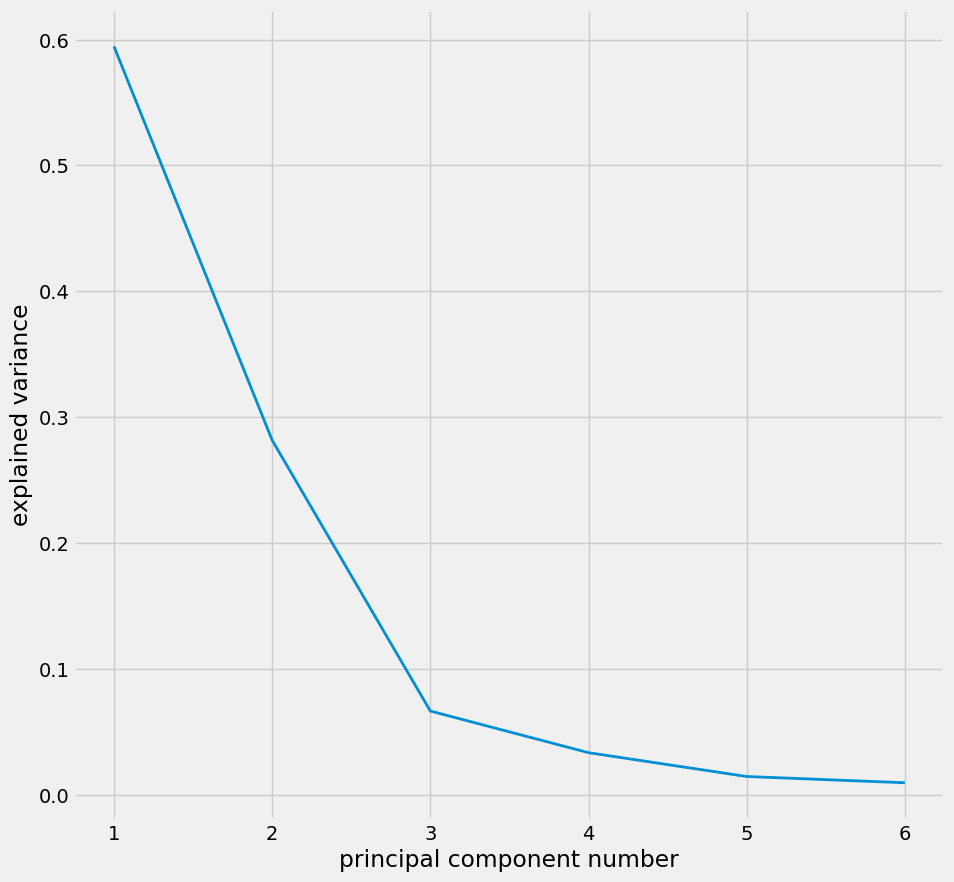

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, len(perdictor_columns) + 1), pc_values)
plt.xlabel("principal component number")
plt.ylabel("explained variance")
plt.show()

In [ ]:
df_pca = PCA.apply_pca(df_pca, perdictor_columns, 3)

<AxesSubplot: xlabel='epoch (ms)'>

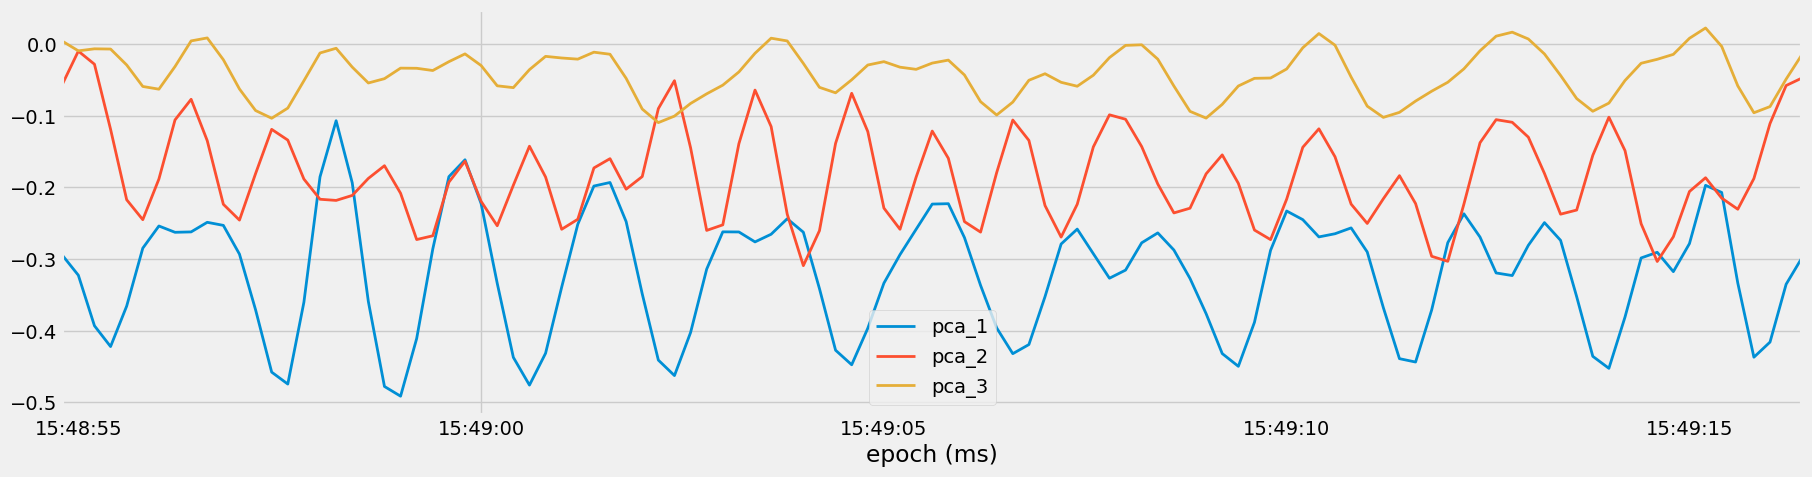

In [ ]:
subset = df_pca[df_pca["set"] == 35]
subset[["pca_1", "pca_2", "pca_3"]].plot()

In [ ]:
df_squared = df_pca.copy()

In [ ]:
acc_r = df_squared["acc_x"] ** 2 + df_squared["acc_y"] ** 2 + df_squared["acc_z"] ** 2
gyr_r = df_squared["gyr_x"] ** 2 + df_squared["gyr_y"] ** 2 + df_squared["gyr_z"] ** 2

In [ ]:
df_squared["acc_r"] = np.sqrt(acc_r)
df_squared["gyr_r"] = np.sqrt(gyr_r)

In [ ]:
df_squared["gyr_r"] = np.sqrt(gyr_r)

In [ ]:
subset = df_squared[df_squared["set"] == 14]

array([<AxesSubplot: xlabel='epoch (ms)'>,
       <AxesSubplot: xlabel='epoch (ms)'>], dtype=object)

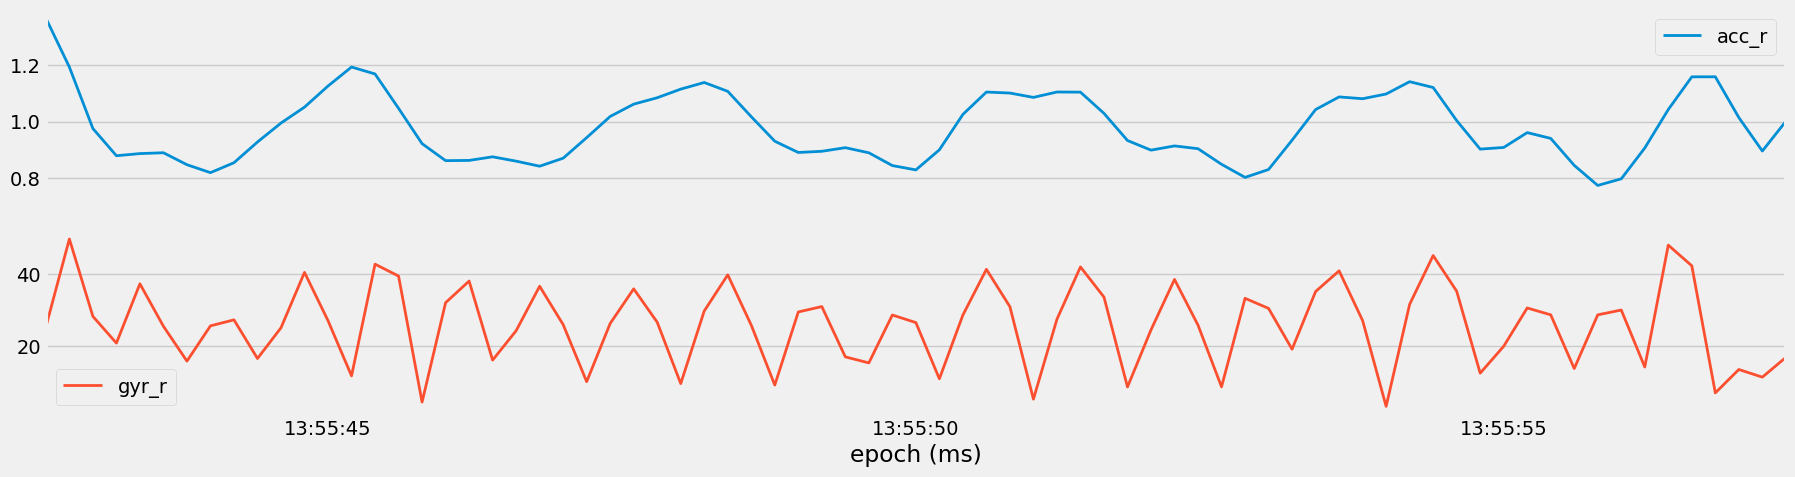

In [ ]:
subset[["acc_r", "gyr_r"]].plot(subplots=True)

In [ ]:
df_temporal = df_squared.copy()

In [ ]:
NumAbs = NumericalAbstraction()

In [ ]:
perdictor_columns = perdictor_columns + ["acc_r", "gyr_r"]

In [ ]:
ws = int(1000 / 200)

In [ ]:
for col in perdictor_columns:
    df_temporal = NumAbs.abstract_numerical(df_temporal, [col], ws, "mean")
    df_temporal = NumAbs.abstract_numerical(df_temporal, [col], ws, "std")

In [ ]:
df_temporal_list = []

In [ ]:
for s in df_temporal["set"].unique():
    subset = df_temporal[df_temporal["set"] == s].copy()
    for col in perdictor_columns:
        subset = NumAbs.abstract_numerical(subset, [col], ws, "mean")
        subset = NumAbs.abstract_numerical(subset, [col], ws, "std")
    df_temporal_list.append(subset)

In [ ]:
df_temporal = pd.concat(df_temporal_list)

<AxesSubplot: xlabel='epoch (ms)'>

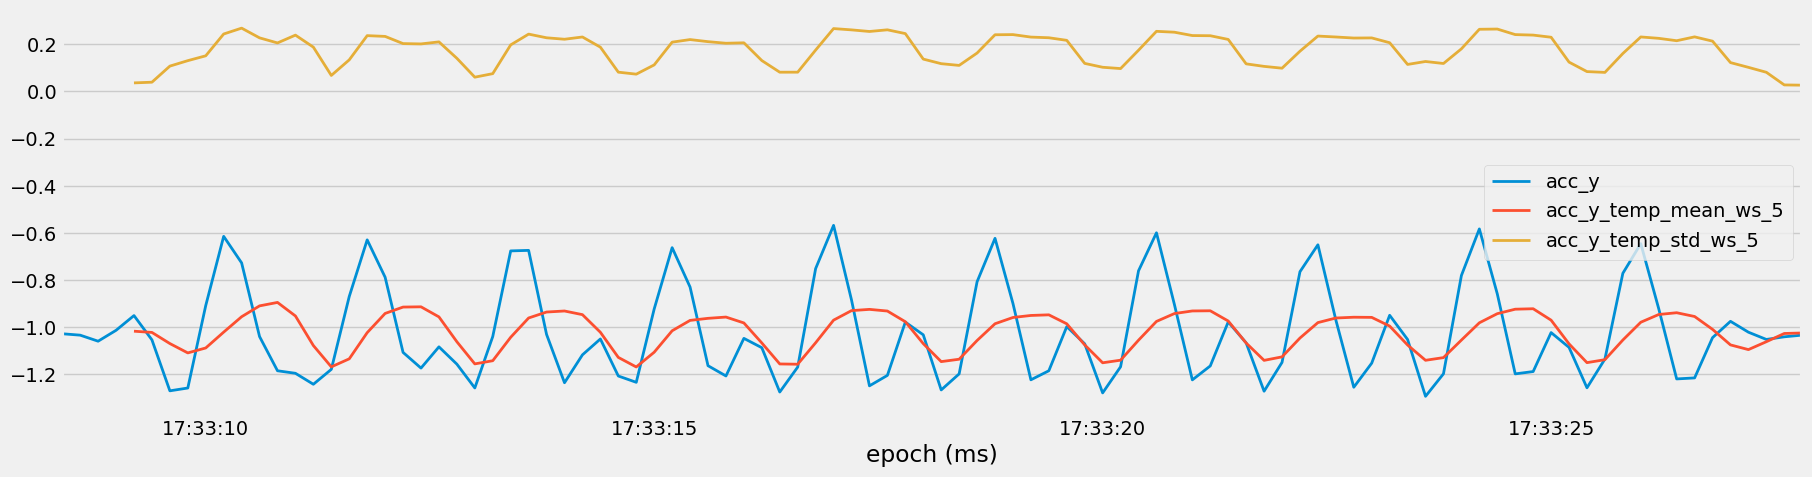

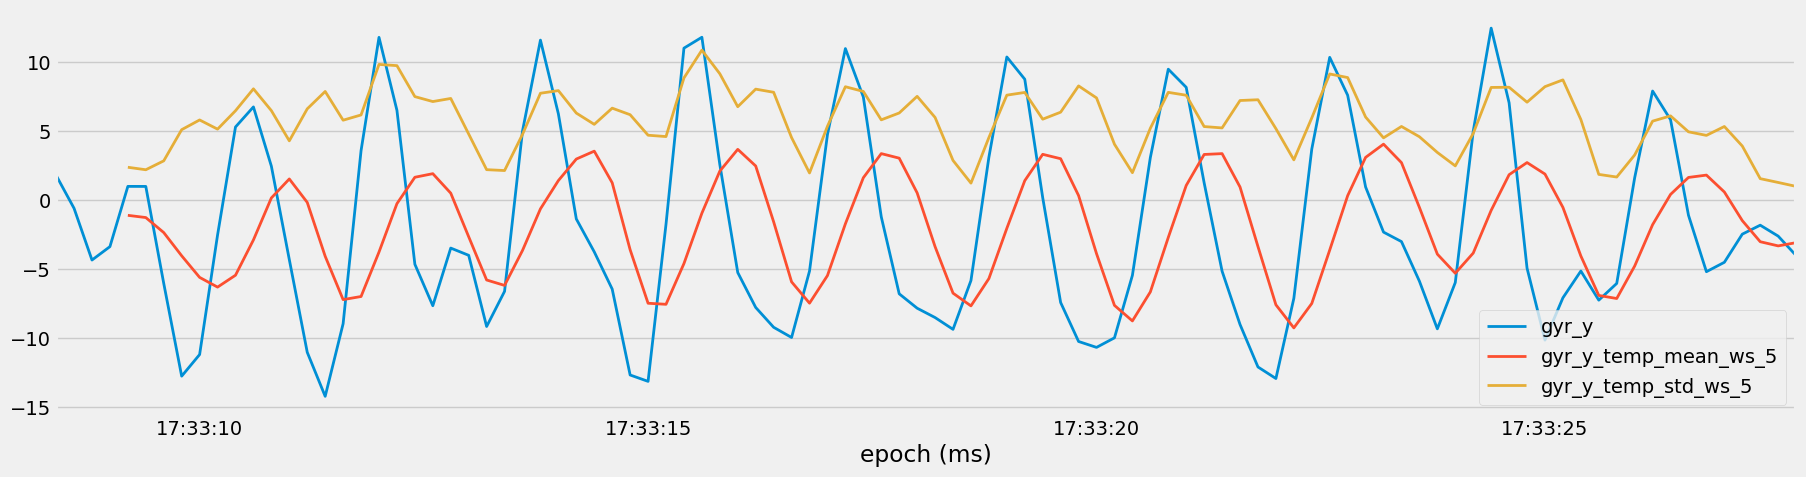

In [ ]:
subset[["acc_y", "acc_y_temp_mean_ws_5", "acc_y_temp_std_ws_5"]].plot()
subset[["gyr_y", "gyr_y_temp_mean_ws_5", "gyr_y_temp_std_ws_5"]].plot()

In [ ]:
df_freq = df_temporal.copy().reset_index()

In [ ]:
FreqAbs = FourierTransformation()

In [ ]:
fs = int(1000 / 200)

In [ ]:
ws = int(2800 / 200)

In [ ]:
df_freq = FreqAbs.abstract_frequency(df_freq, ["acc_y"], ws, fs)

In [ ]:
subset = df_freq[df_freq["set"] == 15]

<AxesSubplot: >

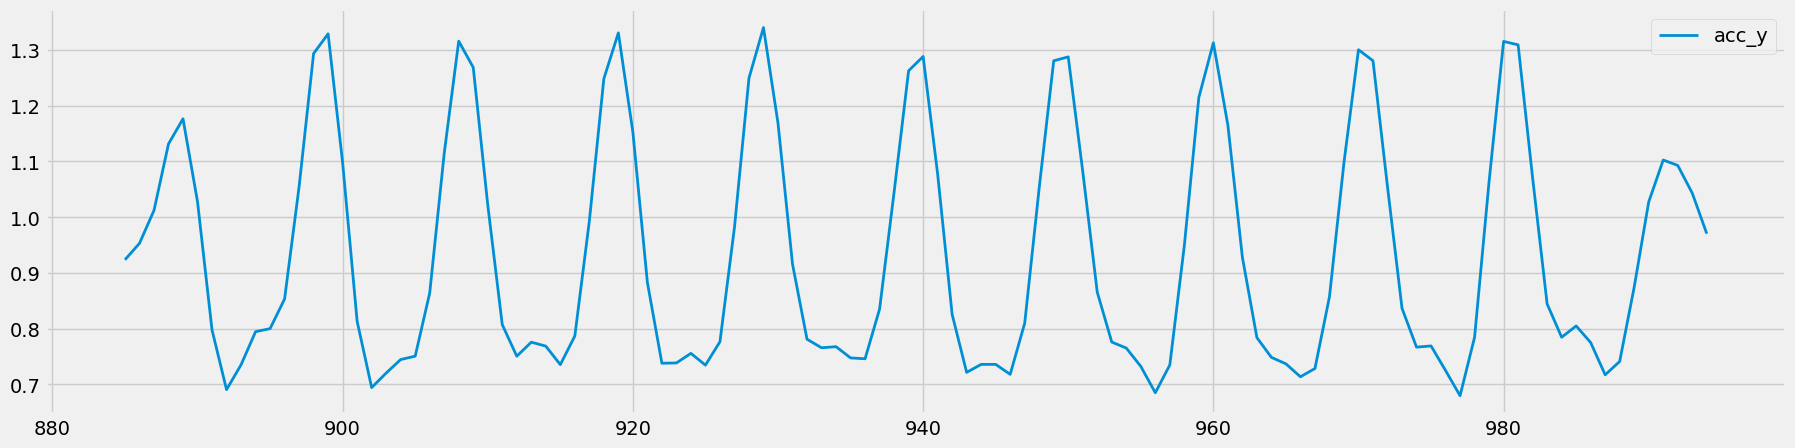

In [ ]:
subset[["acc_y"]].plot()

<AxesSubplot: >

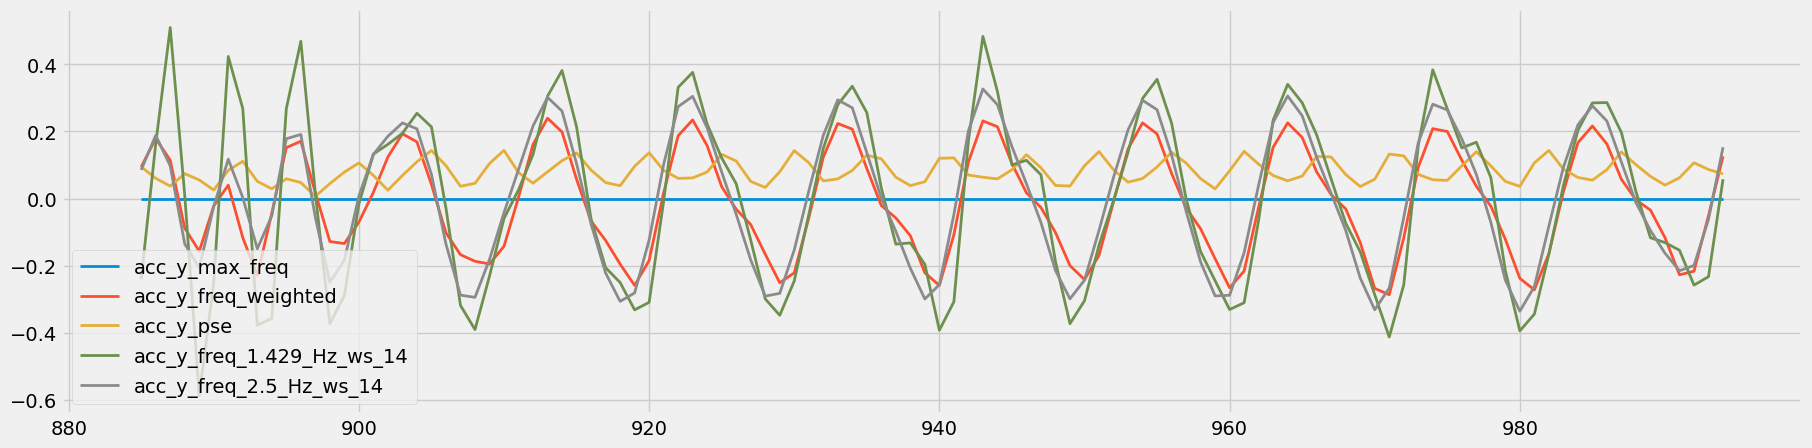

In [ ]:
subset[
    [
        "acc_y_max_freq",
        "acc_y_freq_weighted",
        "acc_y_pse",
        "acc_y_freq_1.429_Hz_ws_14",
        "acc_y_freq_2.5_Hz_ws_14",
    ]
].plot()

<AxesSubplot: >

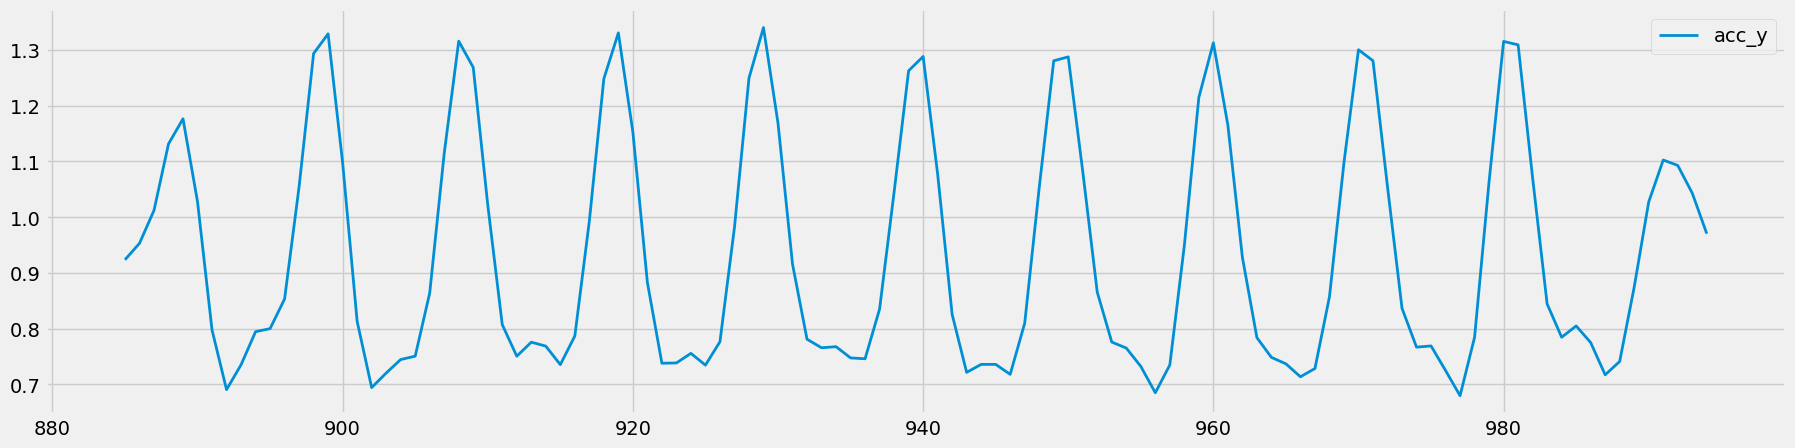

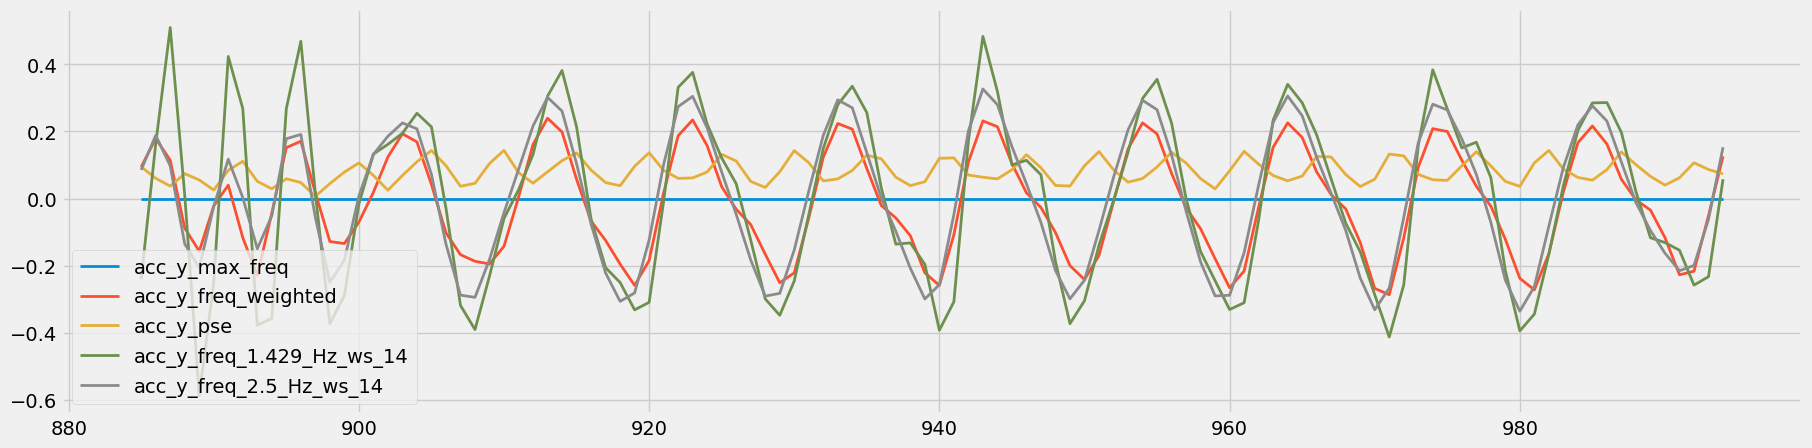

In [ ]:
subset[["acc_y"]].plot()
subset[
    [
        "acc_y_max_freq",
        "acc_y_freq_weighted",
        "acc_y_pse",
        "acc_y_freq_1.429_Hz_ws_14",
        "acc_y_freq_2.5_Hz_ws_14",
    ]
].plot()

In [ ]:
df_freq_list = []

In [ ]:
for s in df_freq["set"].unique():
    print(f"Apply Fourier transformation to set {s}")
    subset = df_freq[df_freq["set"] == s].reset_index(drop=True).copy()
    subset = FreqAbs.abstract_frequency(subset, perdictor_columns, ws, fs)
    df_freq_list.append(subset)

Apply Fourier transformation to set 30
Apply Fourier transformation to set 1
Apply Fourier transformation to set 31
Apply Fourier transformation to set 3
Apply Fourier transformation to set 9
Apply Fourier transformation to set 32
Apply Fourier transformation to set 10
Apply Fourier transformation to set 33
Apply Fourier transformation to set 11
Apply Fourier transformation to set 34
Apply Fourier transformation to set 35
Apply Fourier transformation to set 15
Apply Fourier transformation to set 36
Apply Fourier transformation to set 16
Apply Fourier transformation to set 37
Apply Fourier transformation to set 17
Apply Fourier transformation to set 27
Apply Fourier transformation to set 38
Apply Fourier transformation to set 28
Apply Fourier transformation to set 29
Apply Fourier transformation to set 6
Apply Fourier transformation to set 65
Apply Fourier transformation to set 67
Apply Fourier transformation to set 73
Apply Fourier transformation to set 4
Apply Fourier transformation t

In [ ]:
pd.concat(df_freq_list)

epoch (ms)     acc_x     acc_y     acc_z     gyr_x     gyr_y  \
0  2019-01-11 15:08:05.200  0.013494  0.977006 -0.070995 -1.896395  2.439080   
1  2019-01-11 15:08:05.400  0.006869  0.970289 -0.067545  2.129685  0.528678   
2  2019-01-11 15:08:05.600 -0.009603  0.963587 -0.073447  4.151973 -2.092258   
3  2019-01-11 15:08:05.800 -0.022998  0.965380 -0.083731  2.074477 -3.626288   
4  2019-01-11 15:08:06.000 -0.020032  0.966778 -0.093783  1.041930 -1.219897   
..                     ...       ...       ...       ...       ...       ...   
93 2019-01-20 17:33:27.000 -0.045056 -0.974791 -0.061752  3.273522 -4.487268   
94 2019-01-20 17:33:27.200 -0.042806 -1.020916 -0.057715 -2.514546 -2.449224   
95 2019-01-20 17:33:27.400 -0.047074 -1.051656 -0.066326 -0.673530 -1.799975   
96 2019-01-20 17:33:27.600 -0.049361 -1.040440 -0.066542  2.411744 -2.591221   
97 2019-01-20 17:33:27.800 -0.043963 -1.033252 -0.058673  1.038150 -3.997470   

       gyr_z  label category participant  ...  gyr_r_freq_weighted  gyr_r_pse  \
0   0.939616  bench    heavy           B  ...                  NaN        NaN   
1  -1.248135  bench    heavy           B  ...                  NaN        NaN   
2  -0.929804  bench    heavy           B  ...                  NaN        NaN   
3   0.880509  bench    heavy           B  ...                  NaN        NaN   
4  -2.260590  bench    heavy           B  ...                  NaN        NaN   
..       ...    ...      ...         ...  ...                  ...        ...   
93  0.133850    row   medium           E  ...            -0.289293   0.211363   
94  1.255524    row   medium           E  ...             0.509833   0.608660   
95  1.193779    row   medium           E  ...             0.625087   0.547018   
96  0.659428    row   medium           E  ...             0.096136   0.594520   
97  0.988567    row   medium           E  ...             0.052716   0.310554   

    gyr_r_freq_0.0_Hz_ws_14  gyr_r_freq_0.357_Hz_ws_14  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   
..                      ...                        ...   
93               315.378553                 -32.966667   
94               304.825579                 -41.572736   
95               266.538134                 -67.414847   
96               239.087536                 -68.390244   
97               232.445315                 -36.157719   

    gyr_r_freq_0.714_Hz_ws_14  gyr_r_freq_1.071_Hz_ws_14  \
0                         NaN                        NaN   
1                         NaN                        NaN   
2                         NaN                        NaN   
3                         NaN                        NaN   
4                         NaN                        NaN   
..                        ...                        ...   
93                  25.312515                   9.456436   
94                  57.022041                  78.579281   
95                  35.931545                  37.829734   
96                  10.983161                 -25.394476   
97                   1.772878                 -28.126344   

    gyr_r_freq_1.429_Hz_ws_14  gyr_r_freq_1.786_Hz_ws_14  \
0                         NaN                        NaN   
1                         NaN                        NaN   
2                         NaN                        NaN   
3                         NaN                        NaN   
4                         NaN                        NaN   
..                        ...                        ...   
93                  -2.814943                 -48.443419   
94                 -21.898935                  55.881245   
95                  21.948169                  22.258871   
96                  58.467332                 -26.127372   
97  

In [ ]:
pd.concat(df_freq_list).set_index("epoch (ms)", drop=True)

acc_x     acc_y     acc_z     gyr_x     gyr_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013494  0.977006 -0.070995 -1.896395  2.439080   
2019-01-11 15:08:05.400  0.006869  0.970289 -0.067545  2.129685  0.528678   
2019-01-11 15:08:05.600 -0.009603  0.963587 -0.073447  4.151973 -2.092258   
2019-01-11 15:08:05.800 -0.022998  0.965380 -0.083731  2.074477 -3.626288   
2019-01-11 15:08:06.000 -0.020032  0.966778 -0.093783  1.041930 -1.219897   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.045056 -0.974791 -0.061752  3.273522 -4.487268   
2019-01-20 17:33:27.200 -0.042806 -1.020916 -0.057715 -2.514546 -2.449224   
2019-01-20 17:33:27.400 -0.047074 -1.051656 -0.066326 -0.673530 -1.799975   
2019-01-20 17:33:27.600 -0.049361 -1.040440 -0.066542  2.411744 -2.591221   
2019-01-20 17:33:27.800 -0.043963 -1.033252 -0.058673  1.038150 -3.997470   

                            gyr_z  label category participant  set  ...  \
epoch (ms)                                                          ...   
2019-01-11 15:08:05.200  0.939616  bench    heavy           B   30  ...   
2019-01-11 15:08:05.400 -1.248135  bench    heavy           B   30  ...   
2019-01-11 15:08:05.600 -0.929804  bench    heavy           B   30  ...   
2019-01-11 15:08:05.800  0.880509  bench    heavy           B   30  ...   
2019-01-11 15:08:06.000 -2.260590  bench    heavy           B   30  ...   
...                           ...    ...      ...         ...  ...  ...   
2019-01-20 17:33:27.000  0.133850    row   medium           E   90  ...   
2019-01-20 17:33:27.200  1.255524    row   medium           E   90  ...   
2019-01-20 17:33:27.400  1.193779    row   medium           E   90  ...   
2019-01-20 17:33:27.600  0.659428    row   medium           E   90  ...   
2019-01-20 17:33:27.800  0.988567    row   medium           E   90  ...   

                         gyr_r_freq_weighted  gyr_r_pse  \
epoch (ms)                                                
2019-01-11 15:08:05.200                  NaN        NaN   
2019-01-11 15:08:05.400                  NaN        NaN   
2019-01-11 15:08:05.600                  NaN        NaN   
2019-01-11 15:08:05.800                  NaN        NaN   
2019-01-11 15:08:06.000                  NaN        NaN   
...                                      ...        ...   
2019-01-20 17:33:27.000            -0.289293   0.211363   
2019-01-20 17:33:27.200             0.509833   0.608660   
2019-01-20 17:33:27.400             0.625087   0.547018   
2019-01-20 17:33:27.600             0.096136   0.594520   
2019-01-20 17:33:27.800             0.052716   0.310554   

                         gyr_r_freq_0.0_Hz_ws_14  gyr_r_freq_0.357_Hz_ws_14  \
epoch (ms)                                                                    
2019-01-11 15:08:05.200                      NaN                        NaN   
2019-01-11 15:08:05.400                      NaN                        NaN   
2019-01-11 15:08:05.600                      NaN                        NaN   
2019-01-11 15:08:05.800                      NaN                        NaN   
2019-01-11 15:08:06.000                      NaN                        NaN   
...                                          ...                        ...   
2019-01-20 17:33:27.000               315.378553                 -32.966667   
2019-01-20 17:33:27.200               304.825579                 -41.572736   
2019-01-20 17:33:27.400               266.538134                 -67.414847   
2019-01-20 17:33:27.600               239.087536                 -68.390244   
2019-01-20 17:33:27.800               232.445315                 -36.157719   

                         gyr_r_freq_0.714_Hz_ws_14  gyr_r_freq_1.071_Hz_ws_14  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200                        NaN                        NaN   
2019-01-11 

Connected to tracking-barbell-exercises (Python 3.8.15)

In [ ]:
df_freq = df_temporal.copy().reset_index()

NameError: name 'df_temporal' is not defined

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from DataTransformation import LowPassFilter, PrincipalComponentAnalysis

In [ ]:
from TemporalAbstraction import NumericalAbstraction

In [ ]:
from FrequencyAbstraction import FourierTransformation

In [ ]:
df = pd.read_pickle("../../data/interim/outlier_removed_chauvenets.pkl")

In [ ]:
perdictor_columns = list(df.columns[:6])

In [ ]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [ ]:
plt.rcParams["figure.figsize"] = (20, 5)

In [ ]:
plt.rcParams["figure.dpi"] = 100

In [ ]:
plt.rcParams["lines.linewidth"] = 2

In [ ]:
for col in perdictor_columns:
    df[col] = df[col].interpolate()

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   label        9009 non-null   object 
 7   category     9009 non-null   object 
 8   participant  9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


<AxesSubplot: xlabel='epoch (ms)'>

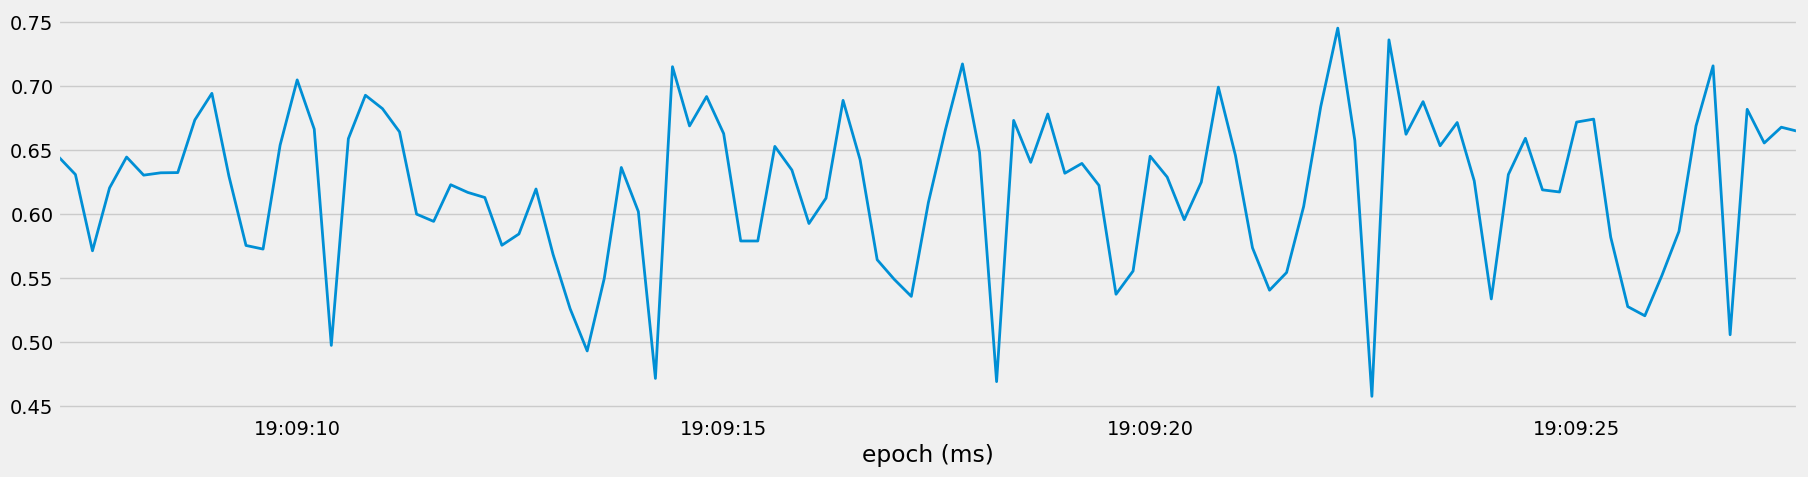

In [ ]:
df[df["set"] == 25]["acc_y"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

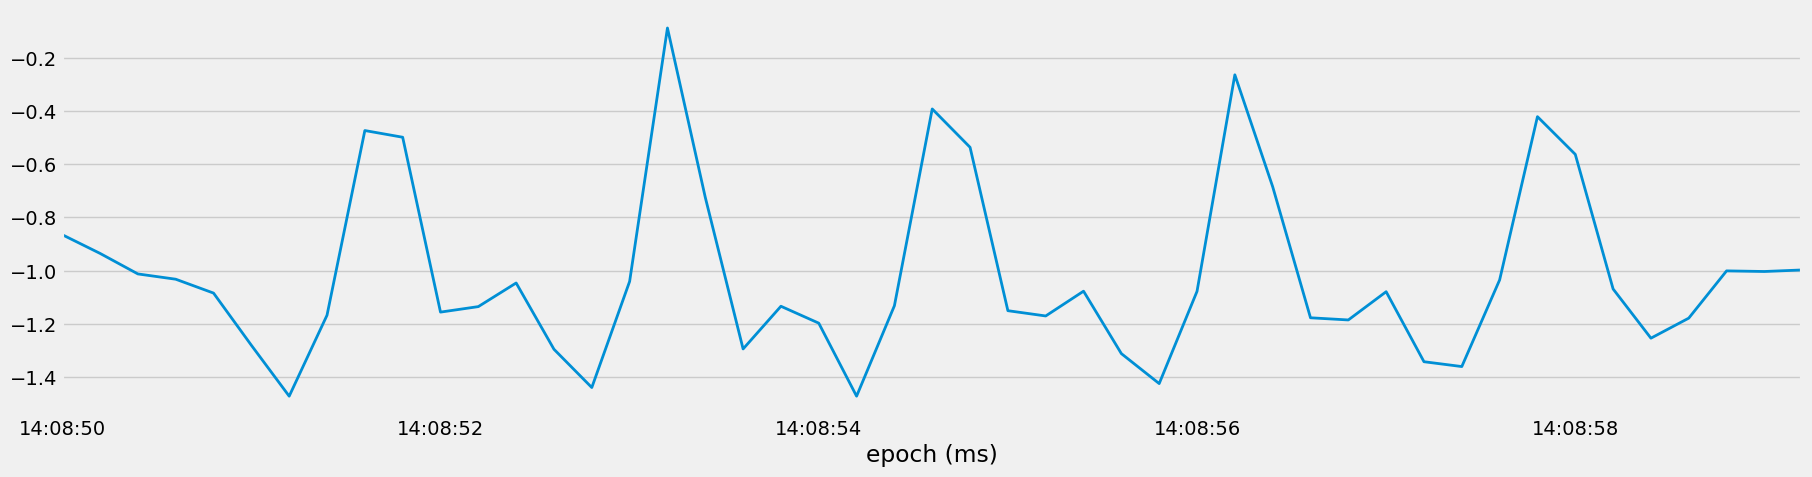

In [ ]:
df[df["set"] == 50]["acc_y"].plot()

In [ ]:
duration = df[df["set"] == 1].index[-1] - df[df["set"] == 1].index[0]
duration.seconds

16

In [ ]:
for s in df["set"].unique():
    start = df[df["set"] == s].index[0]
    stop = df[df["set"] == s].index[-1]

    duration = stop - start
    df.loc[(df["set"] == s), "duration"] = duration.seconds

In [ ]:
duration_df = df.groupby(["category"])["duration"].mean()

In [ ]:
duration_df.iloc[0] / 5
duration_df.iloc[1] / 10

2.4942528735632186

In [ ]:
df_lowpass = df.copy()

In [ ]:
LowPass = LowPassFilter()

In [ ]:
fs = 1000 / 200

In [ ]:
cutoff = 1.2

In [ ]:
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acc_y", fs, cutoff, order=5)

In [ ]:
subset = df_lowpass[df_lowpass["set"] == 45]
print(subset["label"][0])

ohp


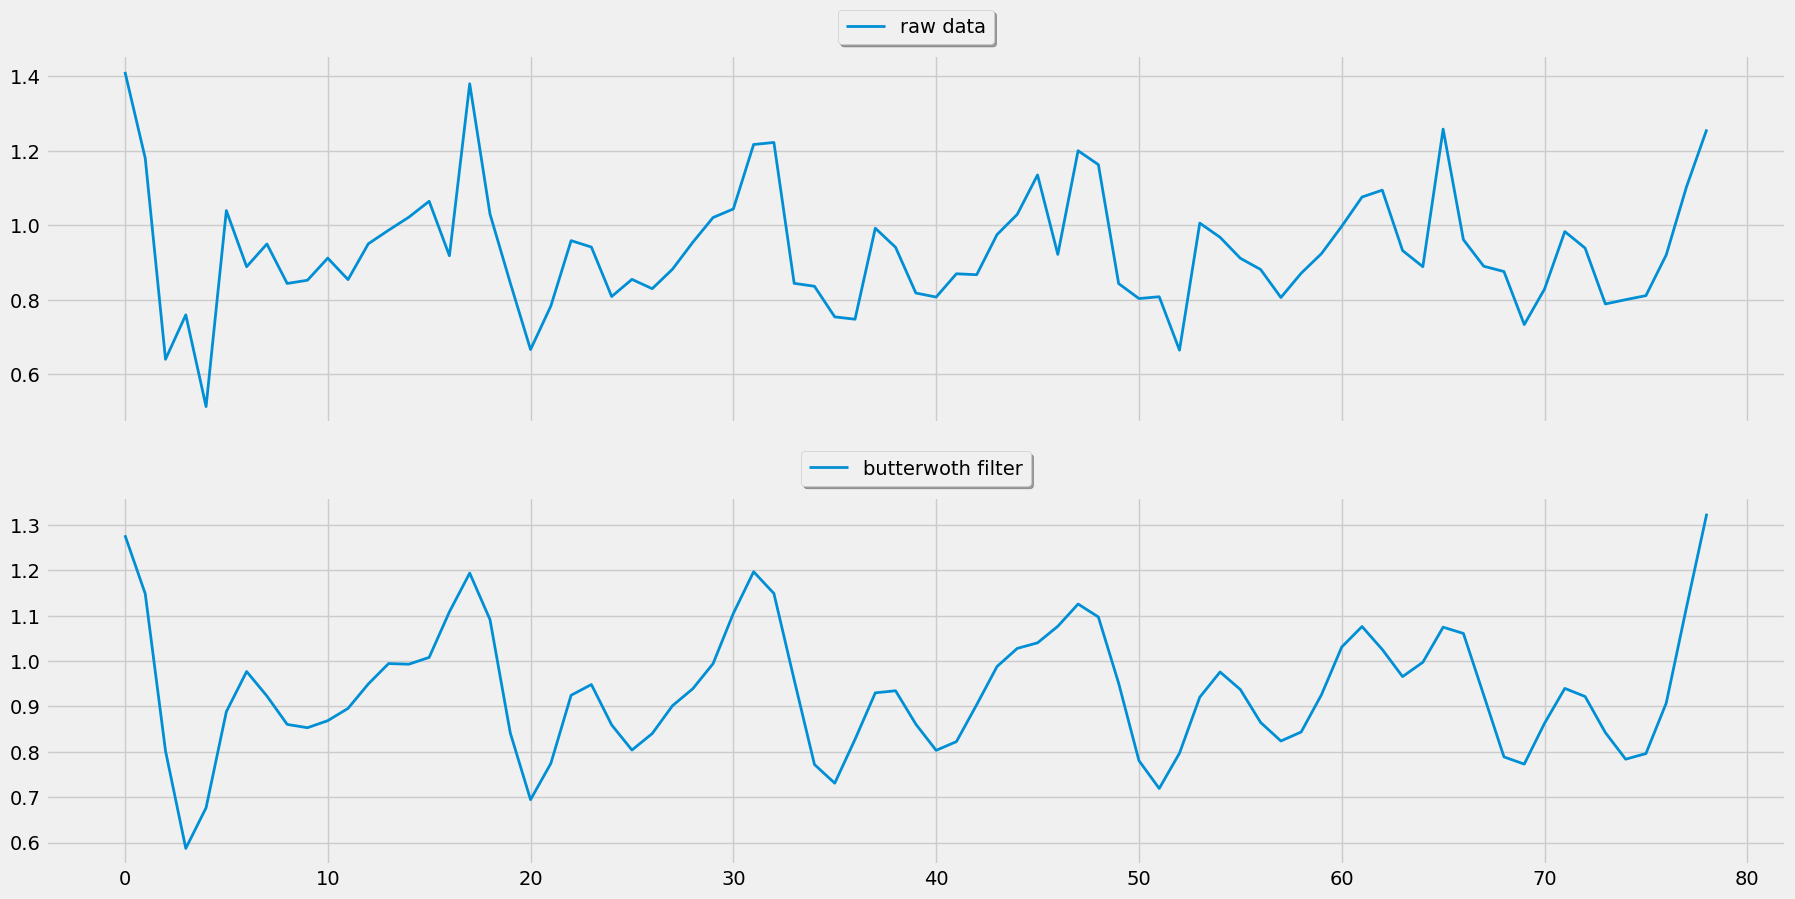

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acc_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop=True), label="butterwoth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)

In [ ]:
for col in perdictor_columns:
    df_lowpass = LowPass.low_pass_filter(df_lowpass, col, fs, cutoff, order=5)
    df_lowpass[col] = df_lowpass[col + "_lowpass"]
    del df_lowpass[col + "_lowpass"]

In [ ]:
df_pca = df_lowpass.copy()

In [ ]:
PCA = PrincipalComponentAnalysis()

In [ ]:
pc_values = PCA.determine_pc_explained_variance(df_pca, perdictor_columns)

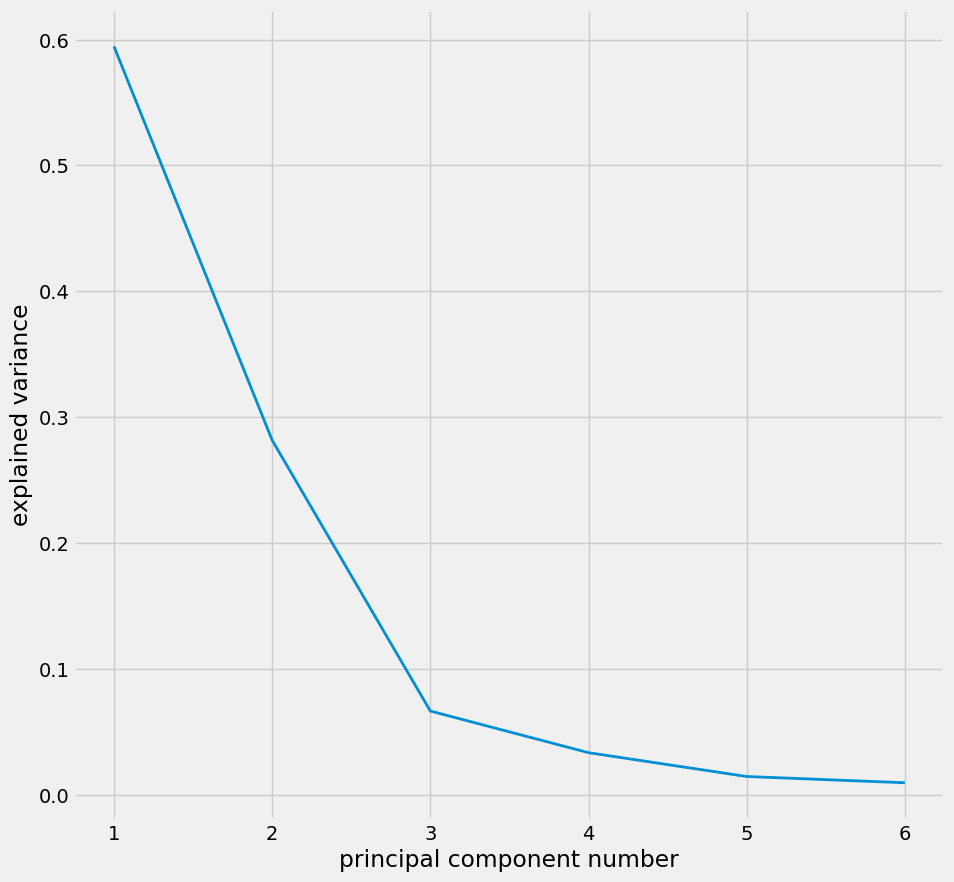

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, len(perdictor_columns) + 1), pc_values)
plt.xlabel("principal component number")
plt.ylabel("explained variance")
plt.show()

In [ ]:
df_pca = PCA.apply_pca(df_pca, perdictor_columns, 3)

<AxesSubplot: xlabel='epoch (ms)'>

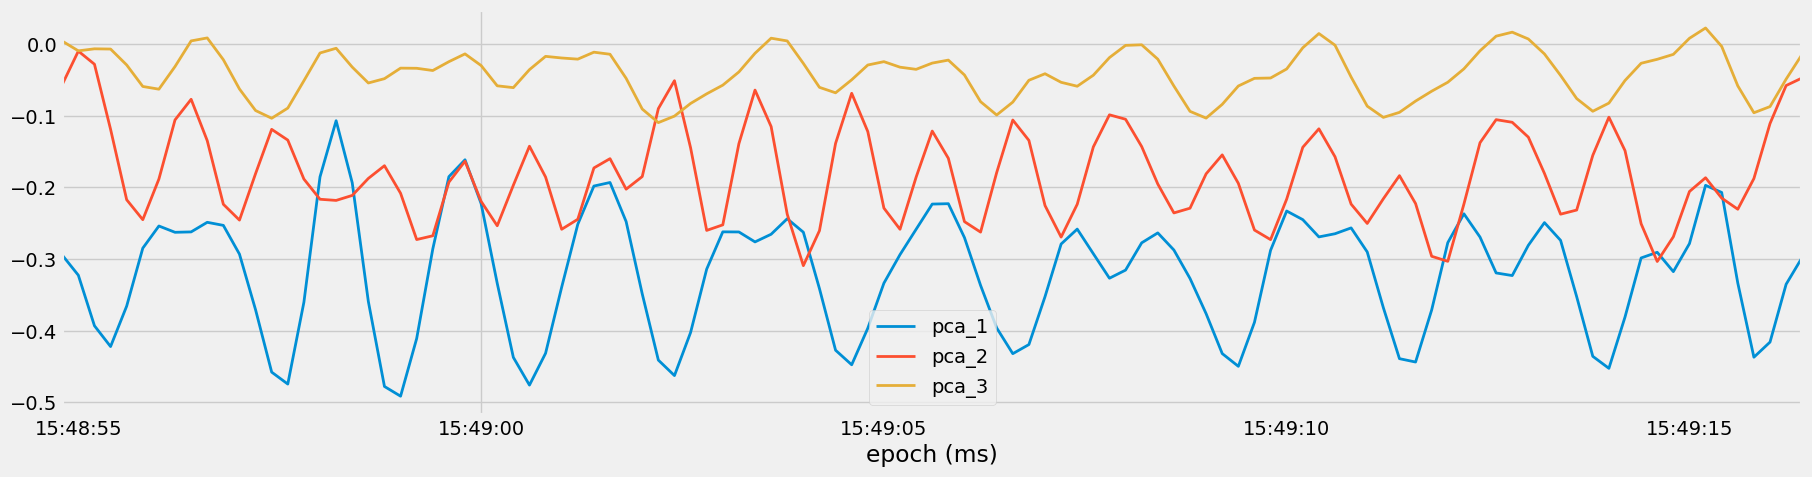

In [ ]:
subset = df_pca[df_pca["set"] == 35]
subset[["pca_1", "pca_2", "pca_3"]].plot()

In [ ]:
df_squared = df_pca.copy()

In [ ]:
acc_r = df_squared["acc_x"] ** 2 + df_squared["acc_y"] ** 2 + df_squared["acc_z"] ** 2

In [ ]:
gyr_r = df_squared["gyr_x"] ** 2 + df_squared["gyr_y"] ** 2 + df_squared["gyr_z"] ** 2

In [ ]:
df_squared["acc_r"] = np.sqrt(acc_r)

In [ ]:
df_squared["gyr_r"] = np.sqrt(gyr_r)

In [ ]:
subset = df_squared[df_squared["set"] == 14]

array([<AxesSubplot: xlabel='epoch (ms)'>,
       <AxesSubplot: xlabel='epoch (ms)'>], dtype=object)

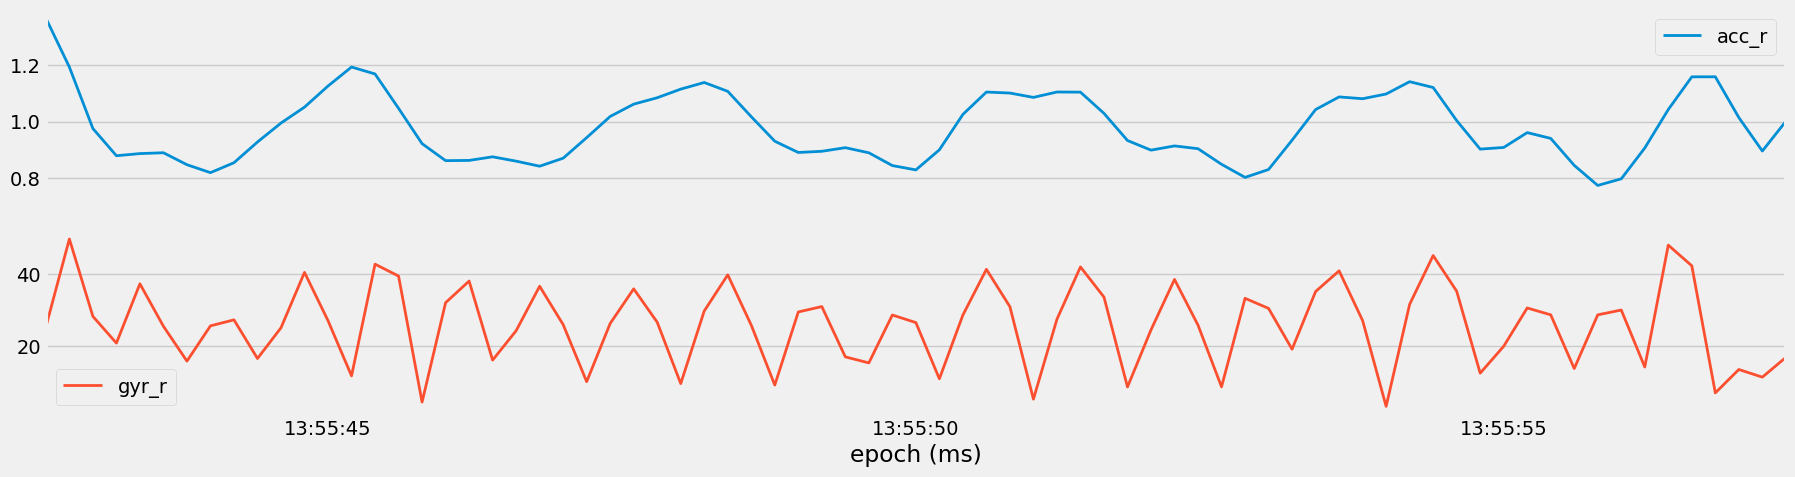

In [ ]:
subset[["acc_r", "gyr_r"]].plot(subplots=True)

In [ ]:
df_temporal = df_squared.copy()

In [ ]:
NumAbs = NumericalAbstraction()

In [ ]:
perdictor_columns = perdictor_columns + ["acc_r", "gyr_r"]

In [ ]:
ws = int(1000 / 200)

In [ ]:
for col in perdictor_columns:
    df_temporal = NumAbs.abstract_numerical(df_temporal, [col], ws, "mean")
    df_temporal = NumAbs.abstract_numerical(df_temporal, [col], ws, "std")

In [ ]:
df_temporal_list = []

In [ ]:
for s in df_temporal["set"].unique():
    subset = df_temporal[df_temporal["set"] == s].copy()
    for col in perdictor_columns:
        subset = NumAbs.abstract_numerical(subset, [col], ws, "mean")
        subset = NumAbs.abstract_numerical(subset, [col], ws, "std")
    df_temporal_list.append(subset)

In [ ]:
df_temporal = pd.concat(df_temporal_list)

<AxesSubplot: xlabel='epoch (ms)'>

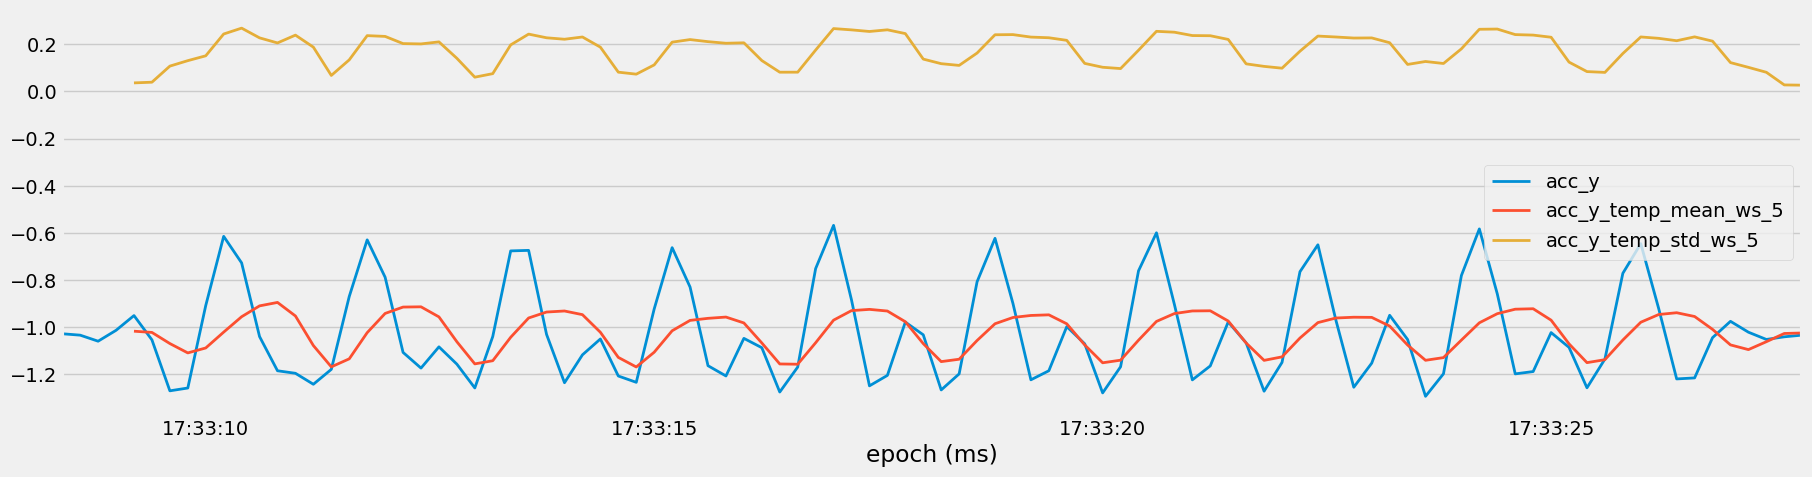

In [ ]:
subset[["acc_y", "acc_y_temp_mean_ws_5", "acc_y_temp_std_ws_5"]].plot()

<AxesSubplot: xlabel='epoch (ms)'>

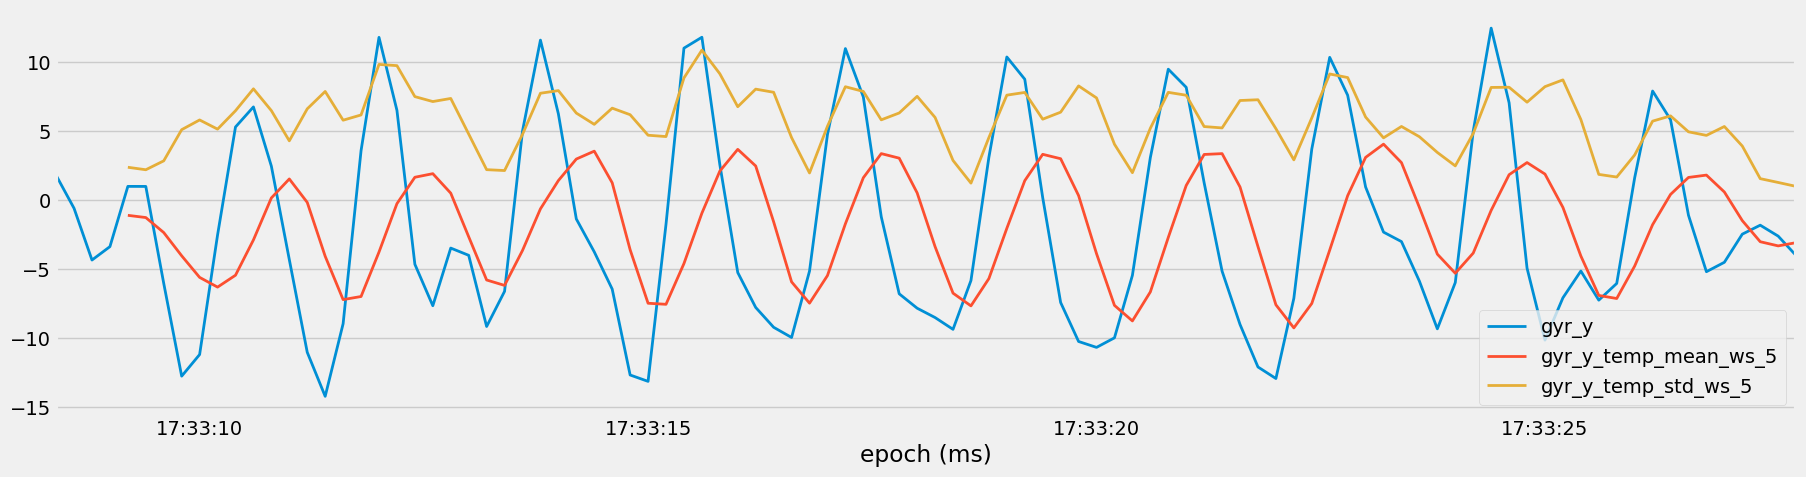

In [ ]:
subset[["gyr_y", "gyr_y_temp_mean_ws_5", "gyr_y_temp_std_ws_5"]].plot()

In [ ]:
df_freq = df_temporal.copy().reset_index()

In [ ]:
FreqAbs = FourierTransformation()

In [ ]:
fs = int(1000 / 200)

In [ ]:
ws = int(2800 / 200)

In [ ]:
df_freq = FreqAbs.abstract_frequency(df_freq, ["acc_y"], ws, fs)

In [ ]:
subset = df_freq[df_freq["set"] == 15]

<AxesSubplot: >

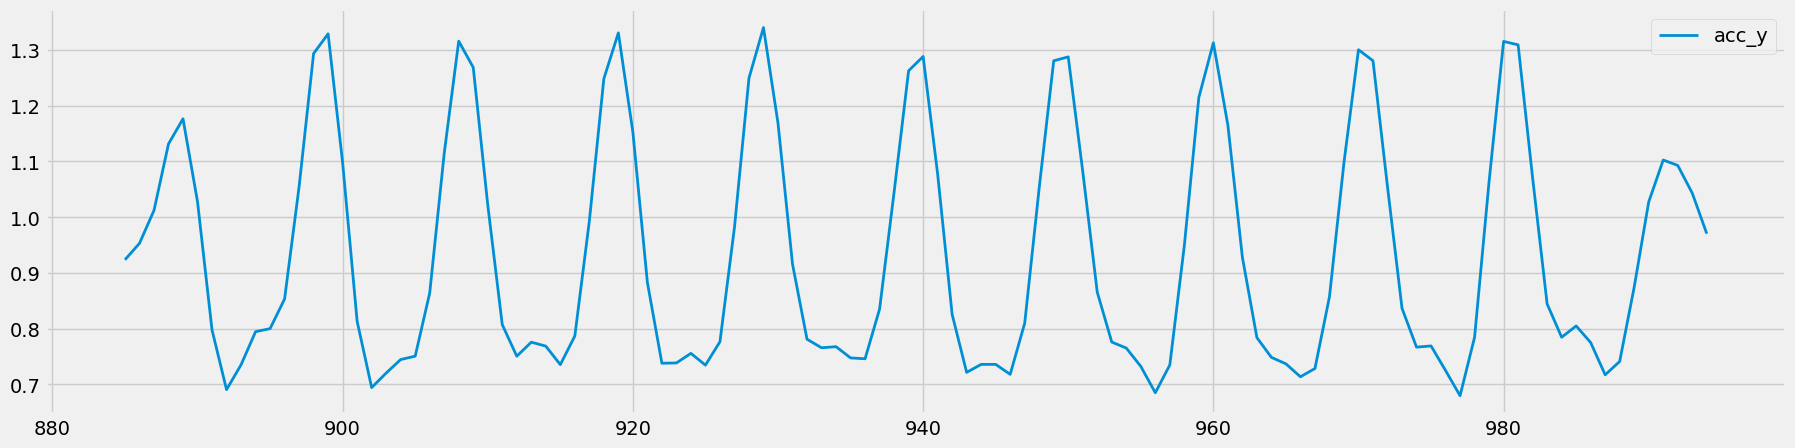

In [ ]:
subset[["acc_y"]].plot()

<AxesSubplot: >

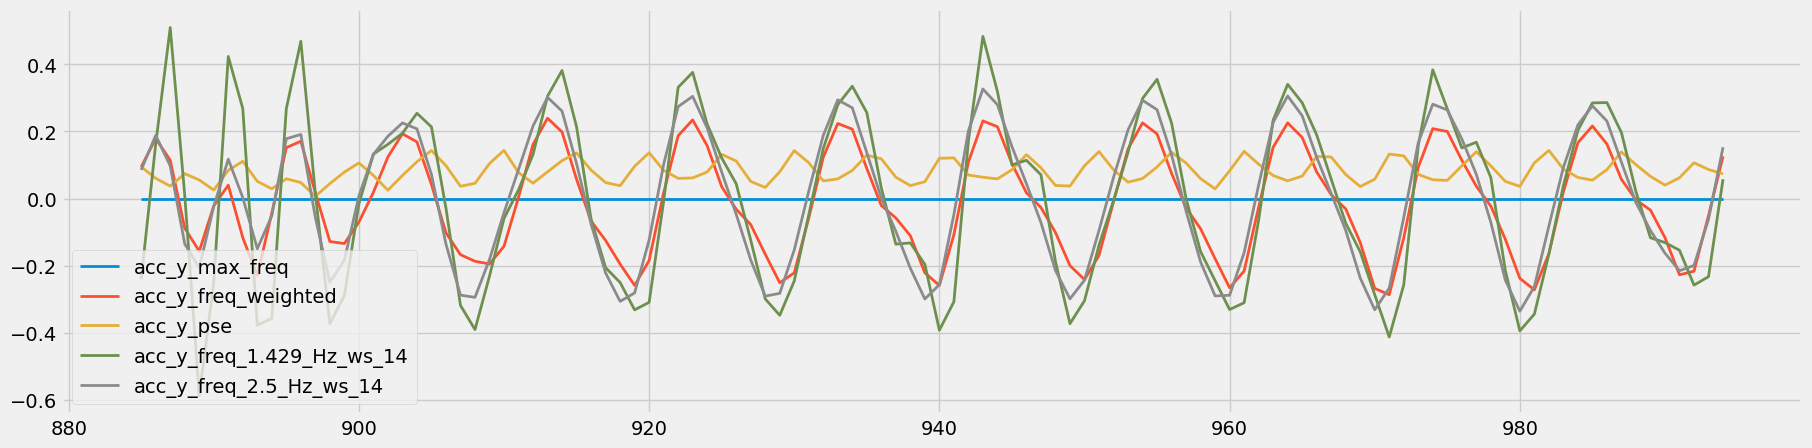

In [ ]:
subset[
    [
        "acc_y_max_freq",
        "acc_y_freq_weighted",
        "acc_y_pse",
        "acc_y_freq_1.429_Hz_ws_14",
        "acc_y_freq_2.5_Hz_ws_14",
    ]
].plot()

In [ ]:
[
    "acc_y_max_freq",
    "acc_y_freq_weighted",
    "acc_y_pse",
    "acc_y_freq_1.429_Hz_ws_14",
    "acc_y_freq_2.5_Hz_ws_14",
]

['acc_y_max_freq',
 'acc_y_freq_weighted',
 'acc_y_pse',
 'acc_y_freq_1.429_Hz_ws_14',
 'acc_y_freq_2.5_Hz_ws_14']

In [ ]:
].plot()

SyntaxError: unmatched ']' (<ipython-input-61-59c4b6e57db4>, line 1)

In [ ]:
plot()

NameError: name 'plot' is not defined

<AxesSubplot: >

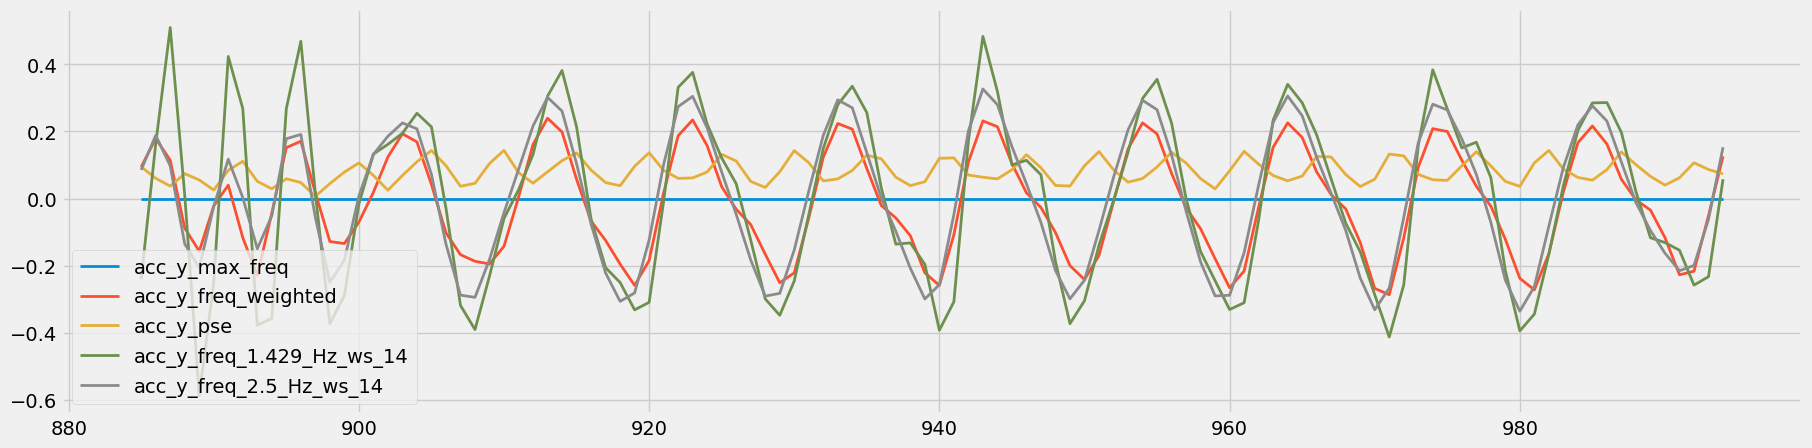

In [ ]:
subset[
    [
        "acc_y_max_freq",
        "acc_y_freq_weighted",
        "acc_y_pse",
        "acc_y_freq_1.429_Hz_ws_14",
        "acc_y_freq_2.5_Hz_ws_14",
    ]
].plot()

In [ ]:
for s in df_freq["s

SyntaxError: EOL while scanning string literal (<ipython-input-64-fe0aa875a02c>, line 1)

In [ ]:
df_freq_list = []

In [ ]:
for s in df_freq["set"].unique():
    print(f"Apply Fourier transformation to set {s}")
    subset = df_freq[df_freq["set"] == s].reset_index(drop=True).copy()
    subset = FreqAbs.abstract_frequency(subset, perdictor_columns, ws, fs)
    df_freq_list.append(subset)

Apply Fourier transformation to set 30
Apply Fourier transformation to set 1
Apply Fourier transformation to set 31
Apply Fourier transformation to set 3
Apply Fourier transformation to set 9
Apply Fourier transformation to set 32
Apply Fourier transformation to set 10
Apply Fourier transformation to set 33
Apply Fourier transformation to set 11
Apply Fourier transformation to set 34
Apply Fourier transformation to set 35
Apply Fourier transformation to set 15
Apply Fourier transformation to set 36
Apply Fourier transformation to set 16
Apply Fourier transformation to set 37
Apply Fourier transformation to set 17
Apply Fourier transformation to set 27
Apply Fourier transformation to set 38
Apply Fourier transformation to set 28
Apply Fourier transformation to set 29
Apply Fourier transformation to set 6
Apply Fourier transformation to set 65
Apply Fourier transformation to set 67
Apply Fourier transformation to set 73
Apply Fourier transformation to set 4
Apply Fourier transformation t

In [ ]:
df_freq = pd.concat(df_freq_list).set_index("epoch (ms)", drop=True)

In [ ]:
df_freq

acc_x     acc_y     acc_z     gyr_x     gyr_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013494  0.977006 -0.070995 -1.896395  2.439080   
2019-01-11 15:08:05.400  0.006869  0.970289 -0.067545  2.129685  0.528678   
2019-01-11 15:08:05.600 -0.009603  0.963587 -0.073447  4.151973 -2.092258   
2019-01-11 15:08:05.800 -0.022998  0.965380 -0.083731  2.074477 -3.626288   
2019-01-11 15:08:06.000 -0.020032  0.966778 -0.093783  1.041930 -1.219897   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.045056 -0.974791 -0.061752  3.273522 -4.487268   
2019-01-20 17:33:27.200 -0.042806 -1.020916 -0.057715 -2.514546 -2.449224   
2019-01-20 17:33:27.400 -0.047074 -1.051656 -0.066326 -0.673530 -1.799975   
2019-01-20 17:33:27.600 -0.049361 -1.040440 -0.066542  2.411744 -2.591221   
2019-01-20 17:33:27.800 -0.043963 -1.033252 -0.058673  1.038150 -3.997470   

                            gyr_z  label category participant  set  ...  \
epoch (ms)                                                          ...   
2019-01-11 15:08:05.200  0.939616  bench    heavy           B   30  ...   
2019-01-11 15:08:05.400 -1.248135  bench    heavy           B   30  ...   
2019-01-11 15:08:05.600 -0.929804  bench    heavy           B   30  ...   
2019-01-11 15:08:05.800  0.880509  bench    heavy           B   30  ...   
2019-01-11 15:08:06.000 -2.260590  bench    heavy           B   30  ...   
...                           ...    ...      ...         ...  ...  ...   
2019-01-20 17:33:27.000  0.133850    row   medium           E   90  ...   
2019-01-20 17:33:27.200  1.255524    row   medium           E   90  ...   
2019-01-20 17:33:27.400  1.193779    row   medium           E   90  ...   
2019-01-20 17:33:27.600  0.659428    row   medium           E   90  ...   
2019-01-20 17:33:27.800  0.988567    row   medium           E   90  ...   

                         gyr_r_freq_weighted  gyr_r_pse  \
epoch (ms)                                                
2019-01-11 15:08:05.200                  NaN        NaN   
2019-01-11 15:08:05.400                  NaN        NaN   
2019-01-11 15:08:05.600                  NaN        NaN   
2019-01-11 15:08:05.800                  NaN        NaN   
2019-01-11 15:08:06.000                  NaN        NaN   
...                                      ...        ...   
2019-01-20 17:33:27.000            -0.289293   0.211363   
2019-01-20 17:33:27.200             0.509833   0.608660   
2019-01-20 17:33:27.400             0.625087   0.547018   
2019-01-20 17:33:27.600             0.096136   0.594520   
2019-01-20 17:33:27.800             0.052716   0.310554   

                         gyr_r_freq_0.0_Hz_ws_14  gyr_r_freq_0.357_Hz_ws_14  \
epoch (ms)                                                                    
2019-01-11 15:08:05.200                      NaN                        NaN   
2019-01-11 15:08:05.400                      NaN                        NaN   
2019-01-11 15:08:05.600                      NaN                        NaN   
2019-01-11 15:08:05.800                      NaN                        NaN   
2019-01-11 15:08:06.000                      NaN                        NaN   
...                                          ...                        ...   
2019-01-20 17:33:27.000               315.378553                 -32.966667   
2019-01-20 17:33:27.200               304.825579                 -41.572736   
2019-01-20 17:33:27.400               266.538134                 -67.414847   
2019-01-20 17:33:27.600               239.087536                 -68.390244   
2019-01-20 17:33:27.800               232.445315                 -36.157719   

                         gyr_r_freq_0.714_Hz_ws_14  gyr_r_freq_1.071_Hz_ws_14  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200                        NaN                        NaN   
2019-01-11 

In [ ]:
df_freq = df_freq.dropna()
df_freq = df_freq.iloc[::2]

In [ ]:
df_freq = df_freq.dropna()

In [ ]:
df_freq = df_freq.iloc[::2]

In [ ]:
df_cluster = df_freq.copy()

In [ ]:
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(2, 10)
inertias = []

In [ ]:
for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

NameError: name 'KMeans' is not defined

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

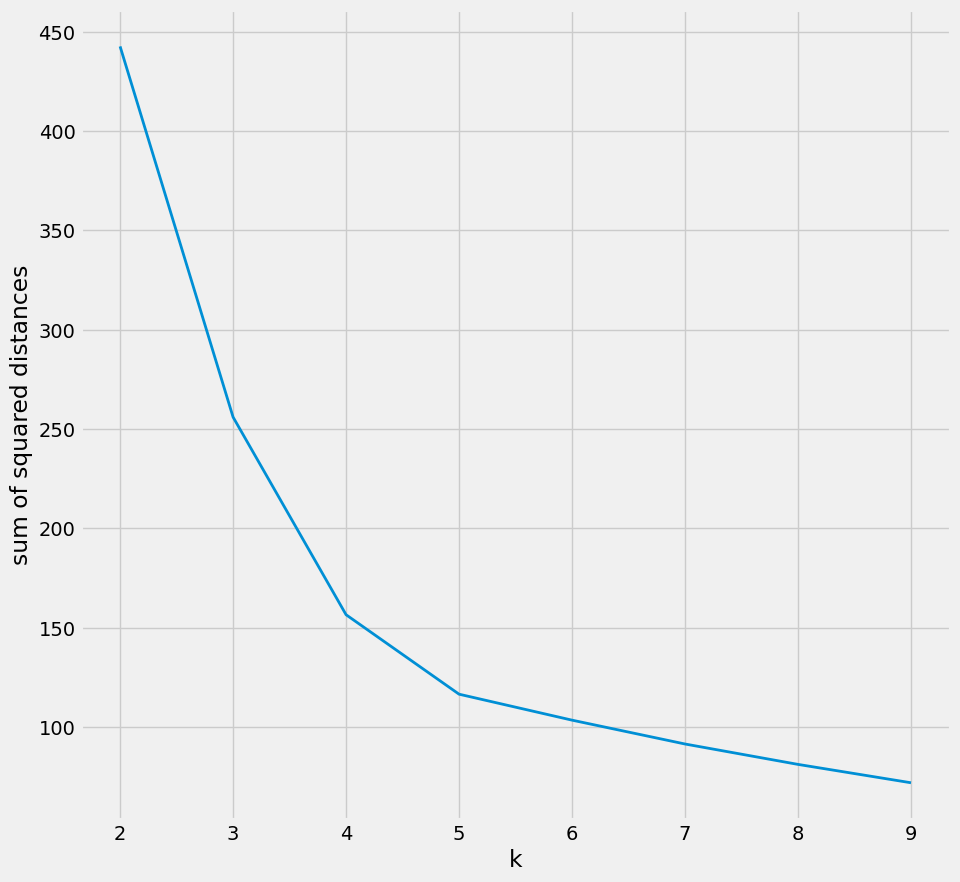

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_values, inertias)
plt.xlabel("k")
plt.ylabel("sum of squared distances")
plt.show()

In [ ]:
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(1, 10)
inertias = []

In [ ]:
for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

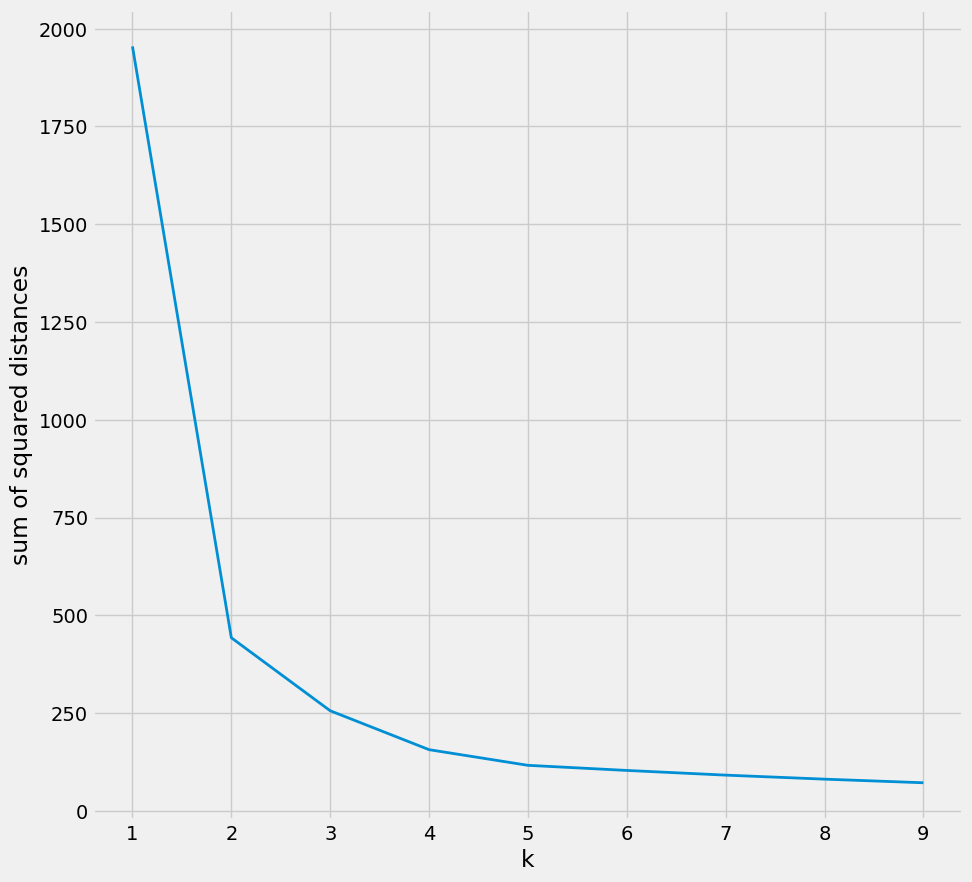

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_values, inertias)
plt.xlabel("k")
plt.ylabel("sum of squared distances")
plt.show()

In [ ]:
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(1.5, 10)
inertias = []

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(1.5, 10)
inertias = []

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(3, 10)
inertias = []

In [ ]:
for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

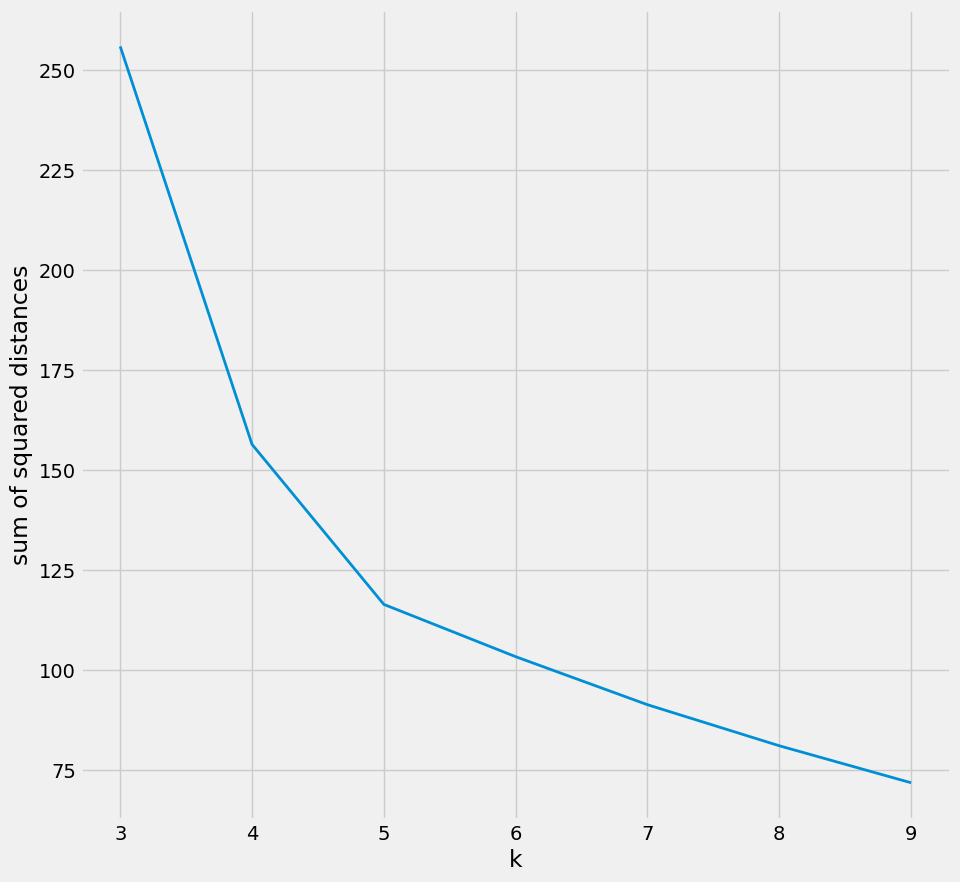

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_values, inertias)
plt.xlabel("k")
plt.ylabel("sum of squared distances")
plt.show()

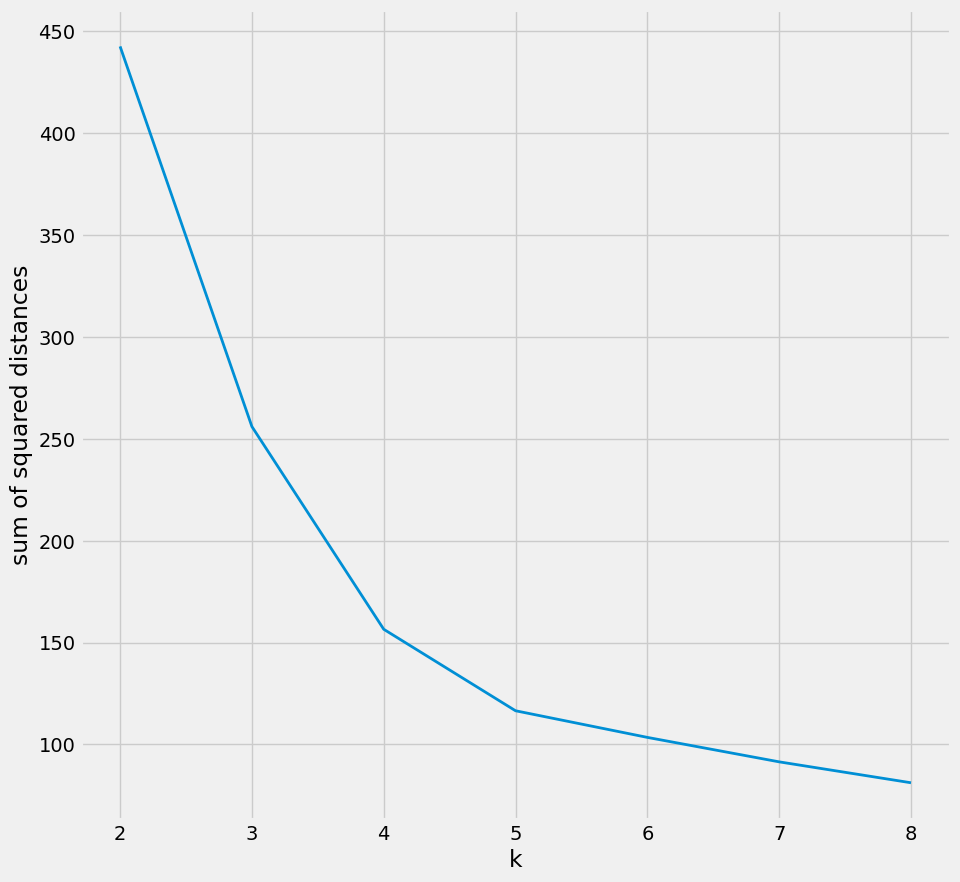

In [ ]:
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(2, 9)
inertias = []

for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 10))
plt.plot(k_values, inertias)
plt.xlabel("k")
plt.ylabel("sum of squared distances")
plt.show()

In [ ]:
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(2, 9)
inertias = []

In [ ]:
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(3, 10)
inertias = []

In [ ]:
for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

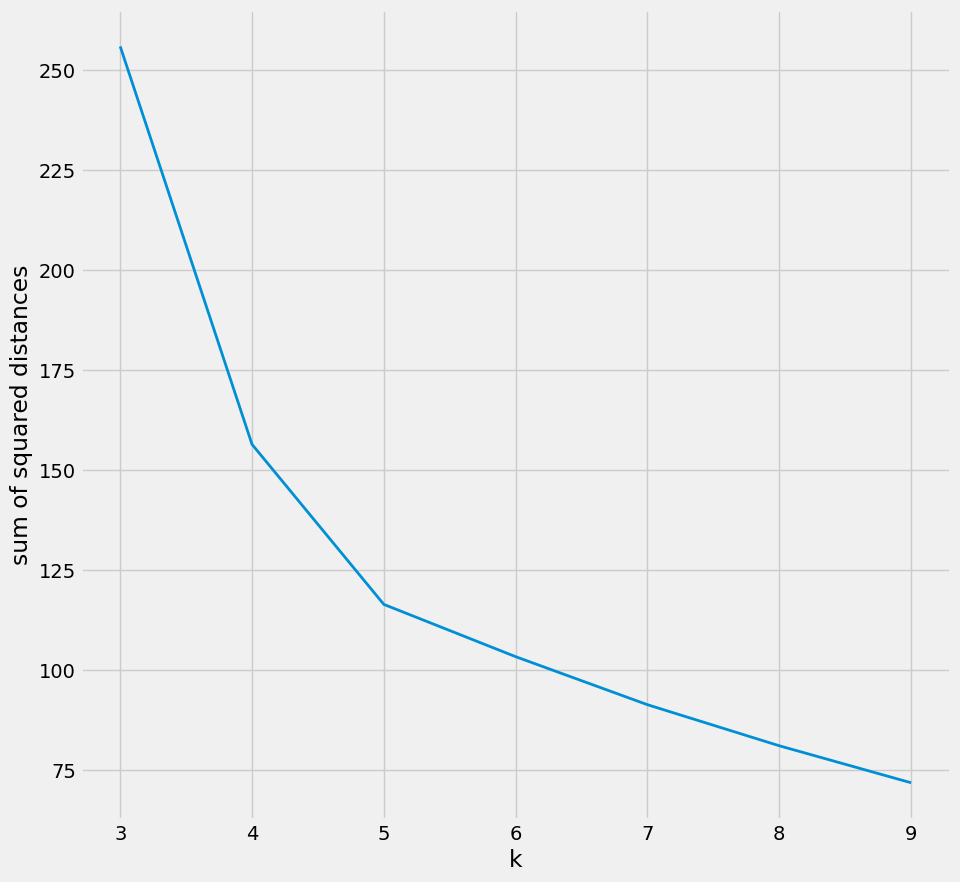

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_values, inertias)
plt.xlabel("k")
plt.ylabel("sum of squared distances")
plt.show()

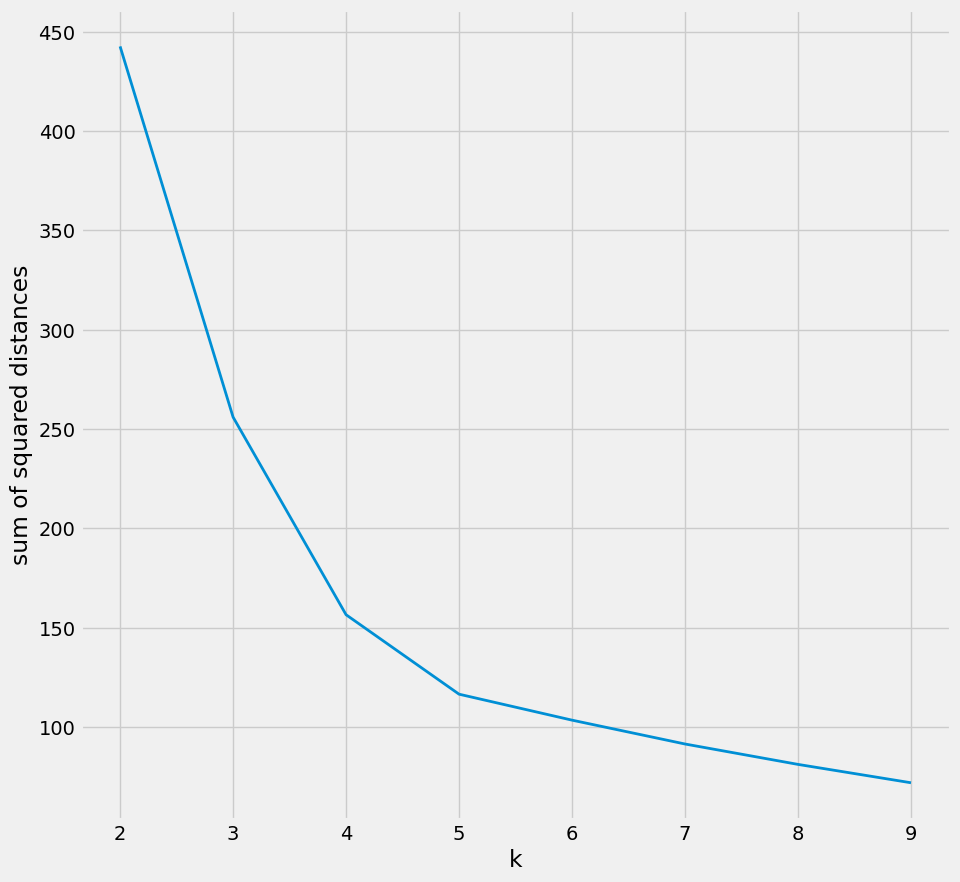

In [ ]:
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(2, 10)
inertias = []

for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 10))
plt.plot(k_values, inertias)
plt.xlabel("k")
plt.ylabel("sum of squared distances")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=20, random_state=0 )
subset = df_cluster[cluster_columns]
df_cluster["cluster"] = kmeans.fit_predict(subset)

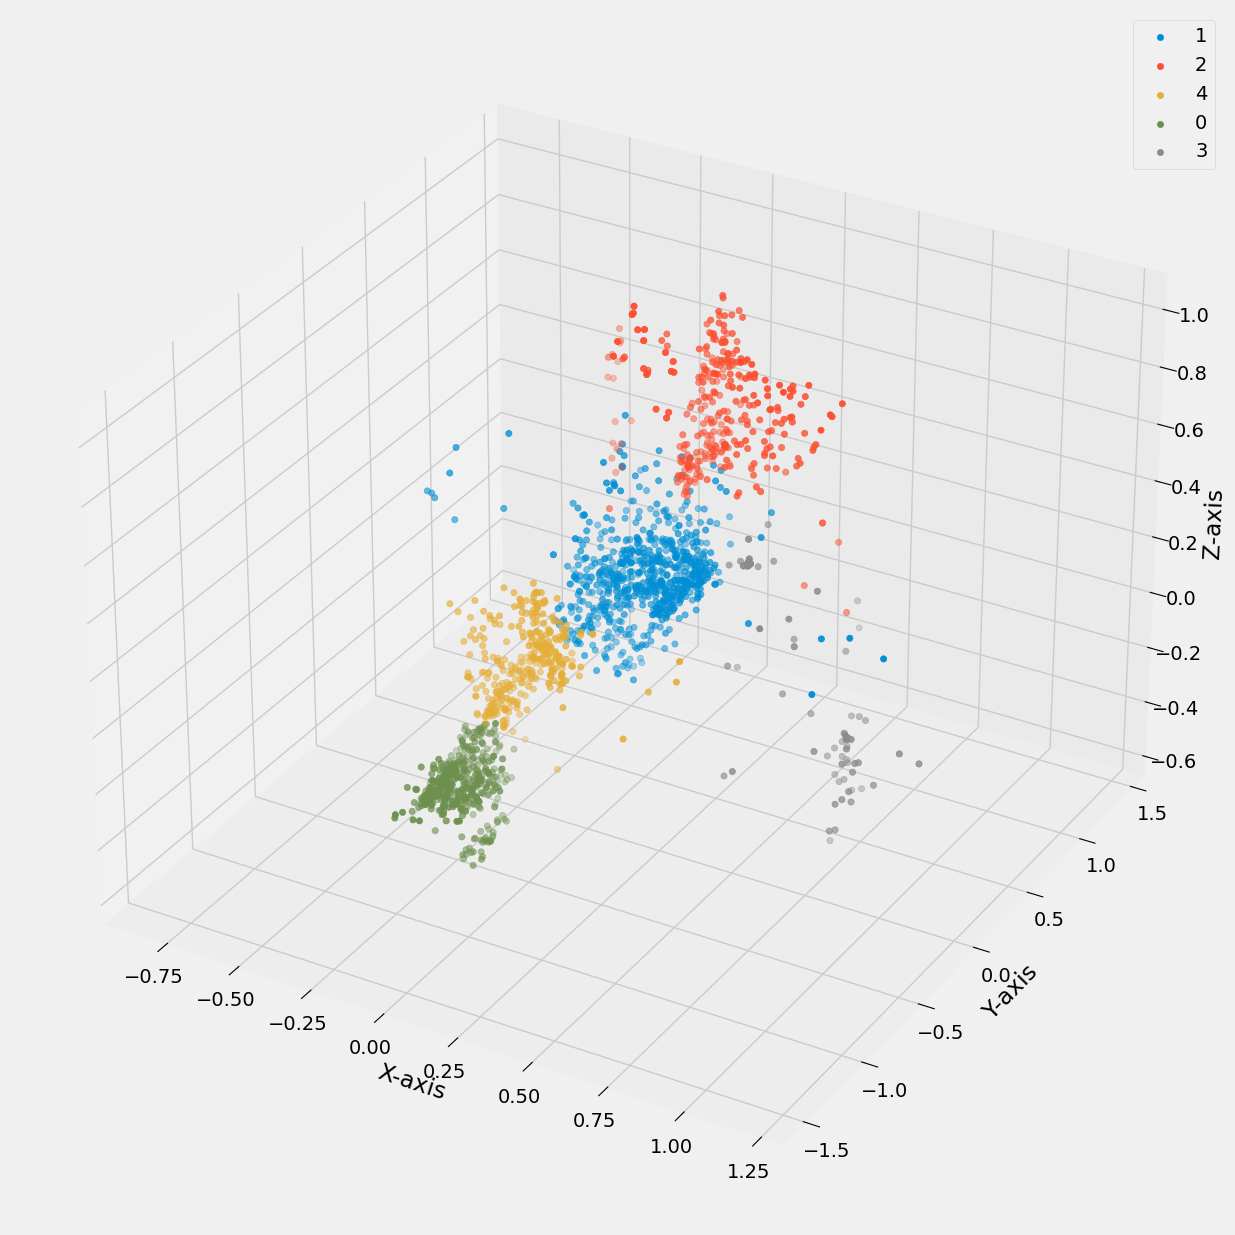

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection="3d")
for c in df_cluster["cluster"].unique():
    subset = df_cluster[df_cluster["cluster"] == c] 
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label=c)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

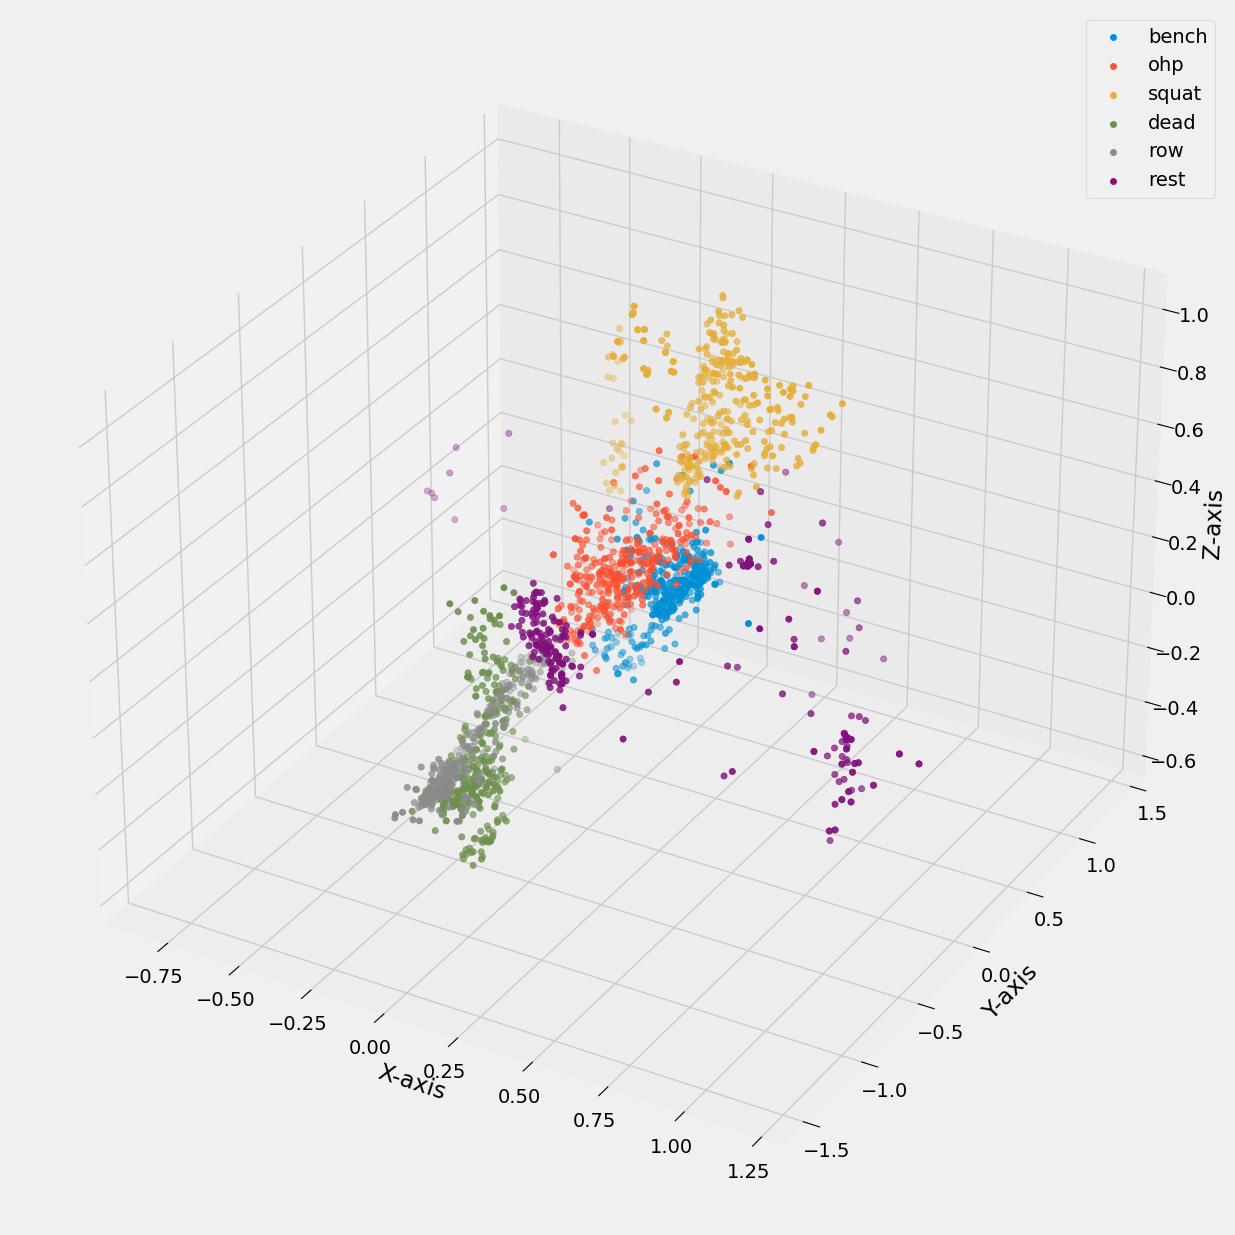

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection="3d")
for l in df_cluster["label"].unique():
    subset = df_cluster[df_cluster["label"] == l] 
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label=l)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

In [ ]:
df_cluster.to_pickle("../../data/interim/03_data_features.pkl")